# Dataset choice

1. Select (create) a dataset1,2, 3 to perform this and other laboratory works. Your choice must be approved by the tutor.

## Requirements
Data set requirements:
- Numeric (integer and real) and categorical values must exist.
- For a dataset, the number of records (rows) m must be at least 500, i.e., ∞> m ≥ 500 and the number of attributes n must be at least 8 (columns) ∞> n ≥ 8. If there are fewer attributes in the selected dataset, you have to add derivatives (created)

## About dataset

The dataset chosen is a set of customers information in IT. The aim of this dataset is to predict customer churn.

Link : [IT Customers Churn (Kaggle.com)](https://www.kaggle.com/datasets/soheiltehranipour/it-customer-churn)


## Attributes

The dataset has 3 different groups of information :
- Services that customer has signed up for
- Customer account information
- Customer demographic information

It also has a column saying if the customer has left the company within the last month.

| Attribute | Type | Description |
| --------- | ---- | ----------- |
| gender | Category | Gender of the customer (male or female) |
| SeniorCitizen | Category | Senior citizen or not (1 or 0) |
| Partner | Category | Customer has a partner or not (Yes or No) |
| Dependents| Category | Customer has dependents or not (Yes or No) |
| tenure | Number (int) | Average time since customer has initiated contracts (in years) |
| PhoneService | Category | Customer has a phone service or not (Yes or No) |
| MultipleLines | Category | Customer has multiples lines |
| InternetService | Category | Type of customer's Internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Category | Customer has online security |
| OnlineBackup | Category | Customer has online backup |
| DeviceProtection | Category | Customer has device protection |
| TechSupport | Category | Customer has tech support |
| StreamingTV | Category | Customer subscribed to Streaming TV |
| StreamingMovies | Category | Customer subscrite to Streaming Movies |
| Contract | Category | Customer contract type (One year, Month-to-month, two year, ...) |
| PaperlessBilling | Category | Customer billing paperless or not (Yes or No) |
| PaymentMethod | Category | Customer payment method |
| MonthlyCharges | Number (float) | Customer monthly charges |
| TotalCharges | Number (float) | Customer total charges |
| Churn | Category | Customer left within the last month (Yes or No) |

# Dataset importation

## Import libraries
Let's import libraries :
- numpy for math 
- pandas for data manipulation and analysis
- matplotlib for plotting

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Load dataset

Loading dataset using the pandas library [read_csv doc](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv).

In [2]:
# Load dataset
dataset = pd.read_csv("IT_customer_churn.csv")

# Check if the csv file has been well loaded by showing a sample of data
dataset.sample(5)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
452     Male              0     Yes         No      60           No   
568   Female              0      No         No      35          Yes   
2178    Male              0     Yes         No      53          Yes   
428     Male              0      No         No      18          Yes   
4933  Female              0      No        Yes       4           No   

         MultipleLines InternetService       OnlineSecurity  \
452   No phone service             DSL                   No   
568                Yes     Fiber optic                   No   
2178                No              No  No internet service   
428                Yes     Fiber optic                   No   
4933  No phone service             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
452                   Yes                  Yes                  Yes   
568                    No                  Yes                   No   
2178  No internet service  No internet service  No internet service   
428                    No                   No                   No   
4933                  Yes                  Yes                   No   

              StreamingTV      StreamingMovies        Contract  \
452                   Yes                  Yes  Month-to-month   
568                   Yes                  Yes  Month-to-month   
2178  No internet service  No internet service        Two year   
428                    No                   No  Month-to-month   
4933                  Yes                  Yes  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
452               Yes  Bank transfer (automatic)           60.20       3582.4   
568               Yes           Electronic check          100.25       3527.6   
2178               No    Credit card (automatic)           19.90      1110.05   
428               Yes  Bank transfer (automatic)           75.60      1395.05   
4933              Yes               Mailed check           57.20       223.75   

     Churn  
452     No  
568    Yes  
2178    No  
428     No  
4933    No

## Check datatypes

In [3]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**SeniorCitizen should be an object**

In [4]:
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(object)

In [5]:
dataset.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**TotalCharges is an object but it should be a float. Let's check that.**

In [6]:
dataset.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The data is string, we need to convert it to float. It also has some spaces in the data...

In [7]:
pd.to_numeric(dataset.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
dataframe1 = dataset[dataset.TotalCharges != ' ']
dataframe1.shape


(7032, 20)

10 row have been removed. Let's convert to float.

In [9]:
ds = pd.to_numeric(dataframe1.TotalCharges)
#dataframe1.TotalCharges = pd.to_numeric(dataframe1.TotalCharges)
dataset.TotalCharges = ds
dataset.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Check if the type has been changed:

In [10]:
dataset.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Dataset quality analysis

### 2. For each countinuous (numeric) type attribute calculate:
- total number of values,
- percentage of missing values,
- cardinality,
- minimum (min) and maximum (max) values,
- 1st and 3rd quartiles,
- average,
- median,
- Standard deviation.

### 3. For each category type attribute calculate:
- total number of values,
- percentage of missing values,
- cardinality
- Mode. Mode is the most frequent sample value.
- The frequency value of the mode
- Percentage value of the mode
- Second mode value (2nd mode),
- Frequency value for 2nd mode,
- Percentage of 2nd mode.

Previously, a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame) was created. Let's use its methods to find statistics we need.

In [11]:
# create empty lists to store the results
results_categories = []
results_numericals = []

for column in dataset.columns:
    # check if the column is a category
    if dataset[column].dtype == 'object':
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        
        value_counts = dataset[column].value_counts()
        result['Mode'] = value_counts.index[0]
        result['Frequency of Mode'] = value_counts.iloc[0]
        result['Percentage of Mode'] = (value_counts.iloc[0] / dataset[column].count()) * 100
        # Check if 2nd Mode exists
        if value_counts.shape[0] > 1:
            result['2nd Mode'] = value_counts.index[1]
            result['Frequency of 2nd Mode'] = value_counts.iloc[1]
            result['Percentage of 2nd Mode'] = (value_counts.iloc[1] / dataset[column].count()) * 100
            
        results_categories.append(result)

    # check if the column is numeric
    else:
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        result['Min'] = dataset[column].min()
        result['Max'] = dataset[column].max()
        result['1st Quartile'] = dataset[column].quantile(0.25)
        result['3rd Quartile'] = dataset[column].quantile(0.75)
        result['Average'] = dataset[column].mean()
        result['Median'] = dataset[column].median()
        result['Standard Deviation'] = dataset[column].std()
        results_numericals.append(result)

## Display dataframe

In [12]:
# Create dataframes from results lists
results_categories_df = pd.DataFrame(results_categories)
results_numericals_df = pd.DataFrame(results_numericals)

# Display dataframes
print(results_numericals_df.to_markdown())
print(results_categories_df.to_markdown())

|    | Attribute      |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |     Max |   1st Quartile |   3rd Quartile |   Average |   Median |   Standard Deviation |
|---:|:---------------|---------------:|-------------------------------:|--------------:|------:|--------:|---------------:|---------------:|----------:|---------:|---------------------:|
|  0 | tenure         |           7043 |                       0        |            73 |  0    |   72    |           9    |          55    |   32.3711 |    29    |              24.5595 |
|  1 | MonthlyCharges |           7043 |                       0        |          1585 | 18.25 |  118.75 |          35.5  |          89.85 |   64.7617 |    70.35 |              30.09   |
|  2 | TotalCharges   |           7032 |                       0.156183 |          6530 | 18.8  | 8684.8  |         401.45 |        3794.74 | 2283.3    |  1397.47 |            2266.77   |
|    | Attribute        |   Total Values |   Percentage of M

|    | Attribute      |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |     Max |   1st Quartile |   3rd Quartile |   Average |   Median |   Standard Deviation |
|---:|:---------------|---------------:|-------------------------------:|--------------:|------:|--------:|---------------:|---------------:|----------:|---------:|---------------------:|
|  0 | tenure         |           7043 |                       0        |            73 |  0    |   72    |           9    |          55    |   32.3711 |    29    |              24.5595 |
|  1 | MonthlyCharges |           7043 |                       0        |          1585 | 18.25 |  118.75 |          35.5  |          89.85 |   64.7617 |    70.35 |              30.09   |
|  2 | TotalCharges   |           7032 |                       0.156183 |          6530 | 18.8  | 8684.8  |         401.45 |        3794.74 | 2283.3    |  1397.47 |            2266.77   |

|    | Attribute        |   Total Values |   Percentage of Missing Values |   Cardinality | Mode             |   Frequency of Mode |   Percentage of Mode | 2nd Mode     |   Frequency of 2nd Mode |   Percentage of 2nd Mode |
|---:|:-----------------|---------------:|-------------------------------:|--------------:|:-----------------|--------------------:|---------------------:|:-------------|------------------------:|-------------------------:|
|  0 | gender           |           7043 |                              0 |             2 | Male             |                3555 |              50.4756 | Female       |                    3488 |                 49.5244  |
|  1 | SeniorCitizen    |           7043 |                              0 |             2 | 0                |                5901 |              83.7853 | 1            |                    1142 |                 16.2147  |
|  2 | Partner          |           7043 |                              0 |             2 | No               |                3641 |              51.6967 | Yes          |                    3402 |                 48.3033  |
|  3 | Dependents       |           7043 |                              0 |             2 | No               |                4933 |              70.0412 | Yes          |                    2110 |                 29.9588  |
|  4 | PhoneService     |           7043 |                              0 |             2 | Yes              |                6361 |              90.3166 | No           |                     682 |                  9.68337 |
|  5 | MultipleLines    |           7043 |                              0 |             3 | No               |                3390 |              48.1329 | Yes          |                    2971 |                 42.1837  |
|  6 | InternetService  |           7043 |                              0 |             3 | Fiber optic      |                3096 |              43.9585 | DSL          |                    2421 |                 34.3746  |
|  7 | OnlineSecurity   |           7043 |                              0 |             3 | No               |                3498 |              49.6663 | Yes          |                    2019 |                 28.6668  |
|  8 | OnlineBackup     |           7043 |                              0 |             3 | No               |                3088 |              43.845  | Yes          |                    2429 |                 34.4881  |
|  9 | DeviceProtection |           7043 |                              0 |             3 | No               |                3095 |              43.9443 | Yes          |                    2422 |                 34.3888  |
| 10 | TechSupport      |           7043 |                              0 |             3 | No               |                3473 |              49.3114 | Yes          |                    2044 |                 29.0217  |
| 11 | StreamingTV      |           7043 |                              0 |             3 | No               |                2810 |              39.8978 | Yes          |                    2707 |                 38.4353  |
| 12 | StreamingMovies  |           7043 |                              0 |             3 | No               |                2785 |              39.5428 | Yes          |                    2732 |                 38.7903  |
| 13 | Contract         |           7043 |                              0 |             3 | Month-to-month   |                3875 |              55.0192 | Two year     |                    1695 |                 24.0664  |
| 14 | PaperlessBilling |           7043 |                              0 |             2 | Yes              |                4171 |              59.2219 | No           |                    2872 |                 40.7781  |
| 15 | PaymentMethod    |           7043 |                              0 |             4 | Electronic check |                2365 |              33.5794 | Mailed check |                    1612 |                 22.888   |
| 16 | Churn            |           7043 |                              0 |             2 | No               |                5174 |              73.463  | Yes          |                    1869 |                 26.537   |


### 4. Draw histograms of attributes 
Recommended number of histogram columns is defined by a formula: $ 1 + 3.22 \times 𝑙𝑜𝑔_𝑒(𝑛) $, where n is sample size. Provide descriptions of the distribution (e.g., normal, exponential, etc.) and what conclusions can be drawn from i

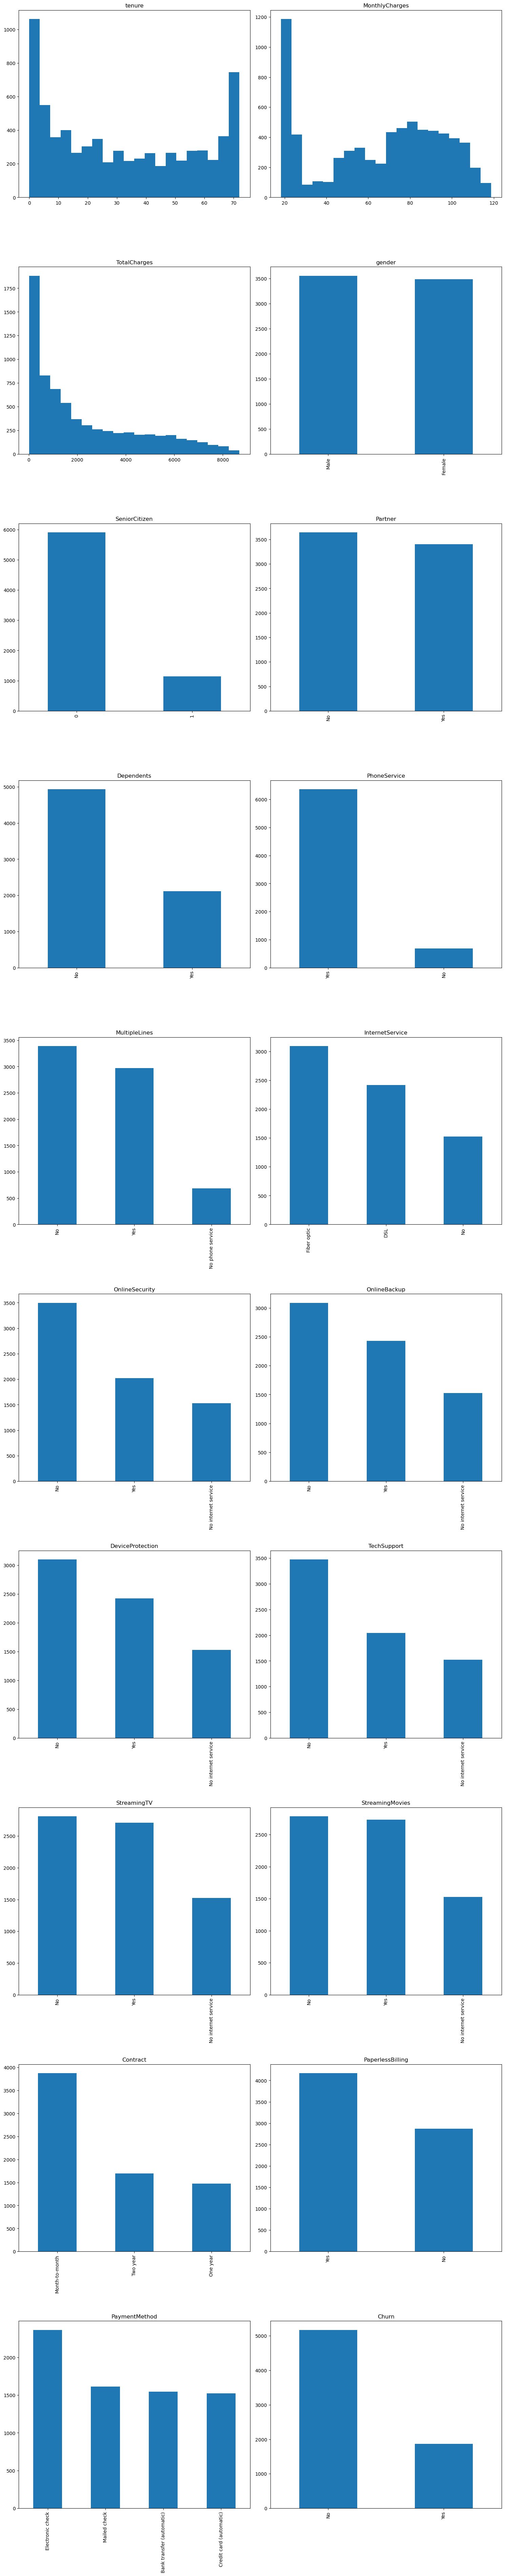

In [13]:
# calculate the recommended number of histogram columns
histogram_col_nb = int(1 + 3.22 * np.log(dataset.shape[0]))

# determine the number of rows needed for the plot
num_histogram_rows = len(dataset.select_dtypes(include=['float64', 'int64']).columns) + \
                     len(dataset.select_dtypes(include=['object']).columns)

# set the height of each subplot
fig, axs = plt.subplots(num_histogram_rows, 2, figsize=(15, 150))

# flatten the array of subplots so that we can easily loop through them
axs = axs.flatten()

# loop through each continuous column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns):
    # plot the histogram for the column
    axs[i].hist(dataset[column].dropna(), bins=20)
    axs[i].set_title(column)
   
# loop through each categorical column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['object']).columns):
    # plot the histogram for the column
    dataset[column].value_counts().plot(kind='bar', ax=axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)])
    axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)].set_title(column)
    
# remove unused subplots
for i in range(len(dataset.columns), len(axs)):
    fig.delaxes(axs[i])

# show the plot
plt.tight_layout()
plt.show()

### Descriptions of histograms

| Attribute | Type | Description of the distribution |
| --------- | ---- | ----------- |
| gender | Category | Two categories, evenly distributed |
| SeniorCitizen | Category | Two categories, there are less seniors than non-senior |
| Partner | Category | Two categories, evenly distributed |
| Dependents| Category | Two categories, there are more dependants |
| tenure | Number (int) | Parabolic distribution |
| PhoneService | Category | Two categories, unevenly distributed, there are more people having a Phone Service |
| MultipleLines | Category | Three categories, evenly distributed for people having a phone service |
| InternetService | Category | Three categories, unevenly distributed, it looks like a linear distribution  |
| OnlineSecurity | Category | Three categories, unevenly distributed, for those having internet, more have no online security |
| OnlineBackup | Category | Three categories, unevenly distributed, for those having internet, more have no online backup but the difference is not important |
| DeviceProtection | Category | Three categories, unevenly distributed, for those having internet, more have no device protection but the difference is small |
| TechSupport | Category | Three categories, unevenly distributed, for those having internet, more have no technical support |
| StreamingTV | Category | Three categories, evenly distributed for those having internet |
| StreamingMovies | Category | Three categories, evenly distributed for those having internet |
| Contract | Category | Three categories, unevenly distributed, half people have month-to-month contract, the other is evenly distributed between one and two year contract  |
| PaperlessBilling | Category | Two categories, unevenly distributed, more people have paperless billing |
| PaymentMethod | Category | Four categories, more people have electronic check payment, for the three other categories it is evenly distributed |
| MonthlyCharges | Number (float) | Normal distribution with a peak on the very left |
| TotalCharges | Number (float) | Positivily skewed |
| Churn | Category | Two categories, unevenly distributed, there are less churn |

## 5. Identify data quality problems: missing values, cardinality problems, outliers. Provide a plan for resolving these issues, which will be implemented programmatically (e.g. missing categorical attribute values will be included based on an attribute‘s mode estimate, extreme values are eliminated or adjusted).

- Problem with TotalCharges, it has 10 missing values
- Churn is imbalanced
- Some attributes has two types of No, they can be replaced by a single No

### Changes to 'No's

In [14]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(dataset)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [15]:
dataset.replace('No internet service','No',inplace=True)
dataset.replace('No phone service','No',inplace=True)
print_unique_col_values(dataset)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## 6. Investigate relationships between attributes using visualization techniques:

**For continuous type attributes:**
- Using a scatter plot type graph, provide several (2-3) examples with strong linear attribute dependency (direct or inverse correlation) and several examples with non-correlated (weakly correlated) attributes. Comment the results.
- Provide SPLOM diagram (Scatter Plot Matrix).



### Scatter plot

### SPLOM diagram

array([[<AxesSubplot:xlabel='tenure', ylabel='tenure'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>],
       [<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>],
       [<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='TotalCharges'>]],
      dtype=object)

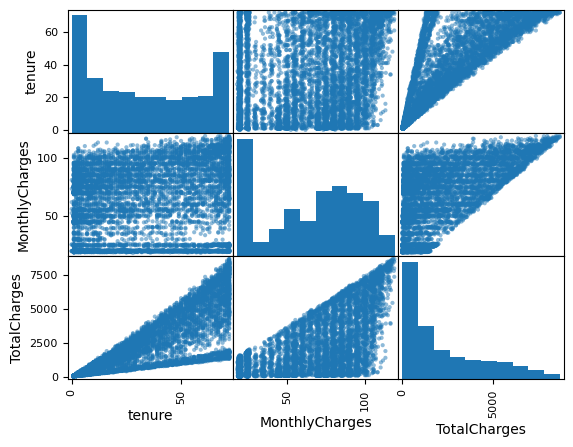

In [16]:
# Plot splom diagram
pd.plotting.scatter_matrix(dataset.drop('SeniorCitizen', axis=1))

**For categorical attributes:**
- Using the bar plot type diagram, give some (2-3) examples of attribute dependency and comment the results.
- Provide some (2-3) examples of histograms and box plot diagrams depicting relationships between categorical and continuous type variables.


/home/ronan/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


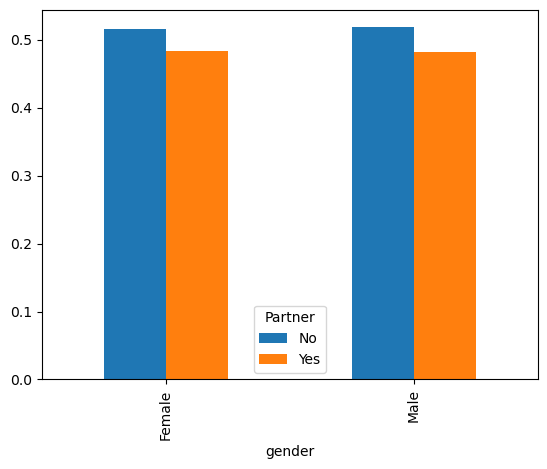

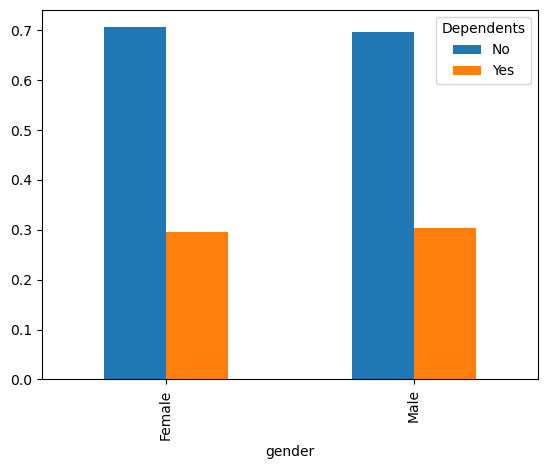

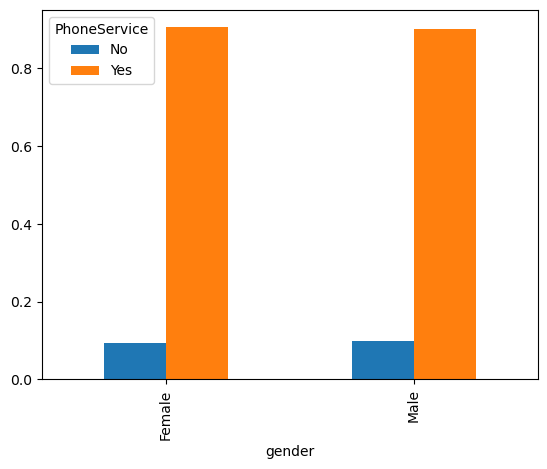

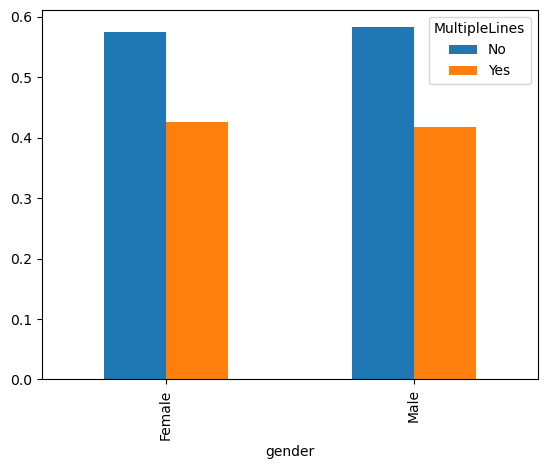

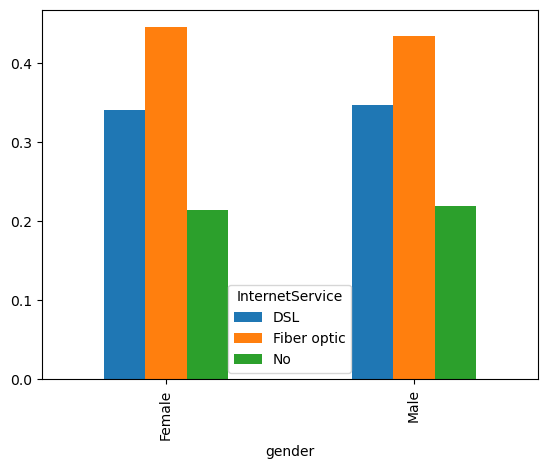

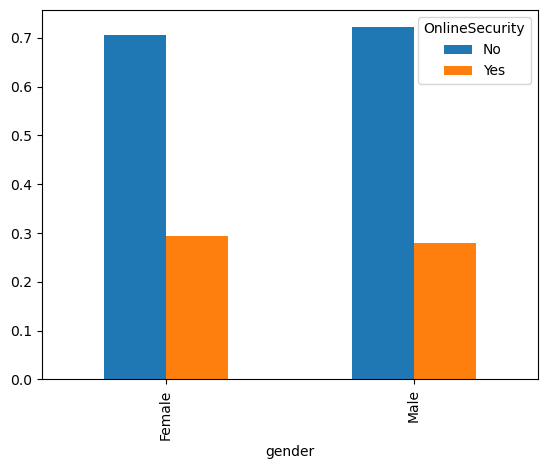

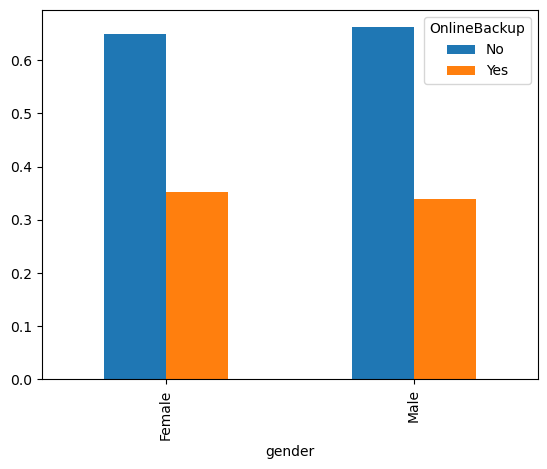

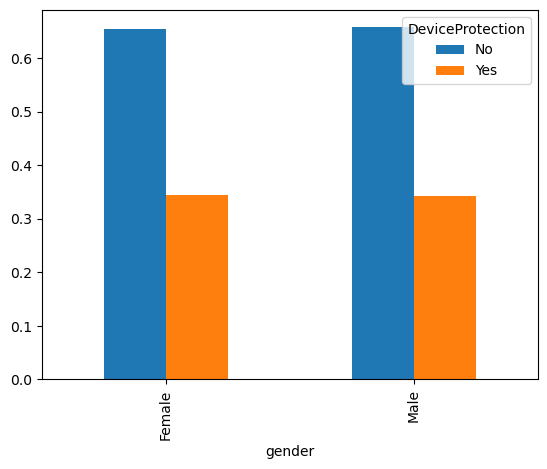

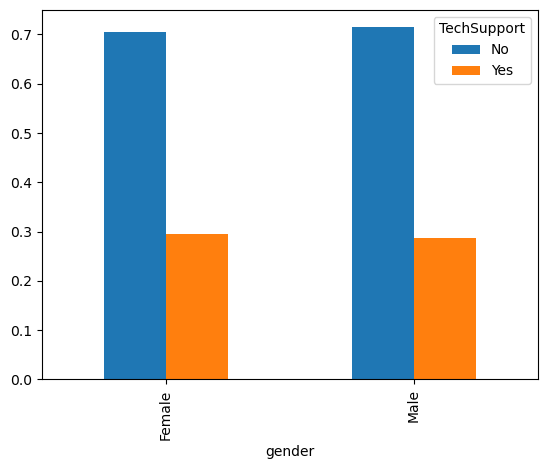

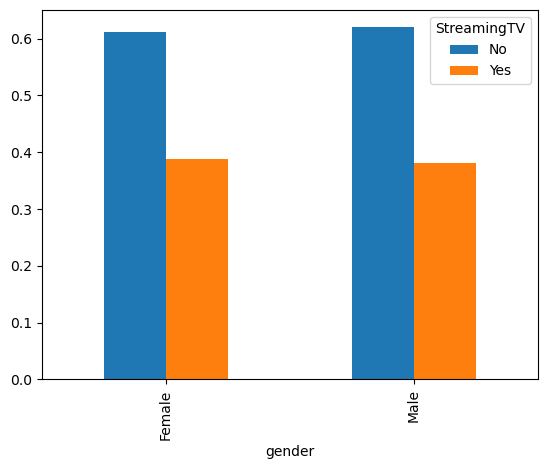

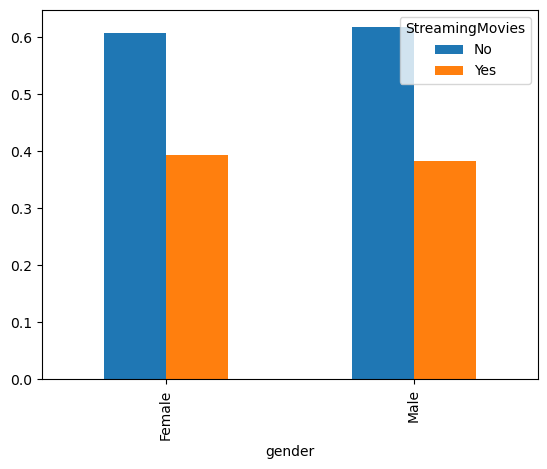

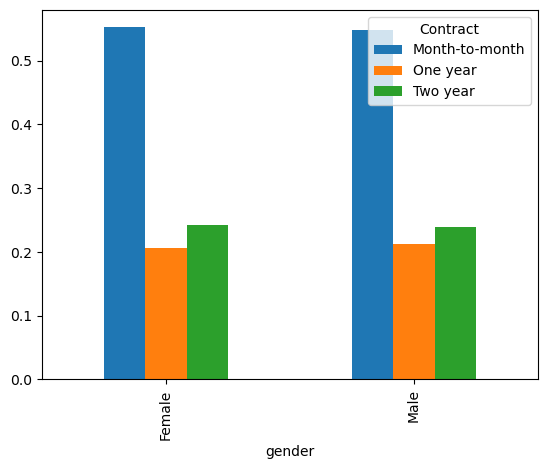

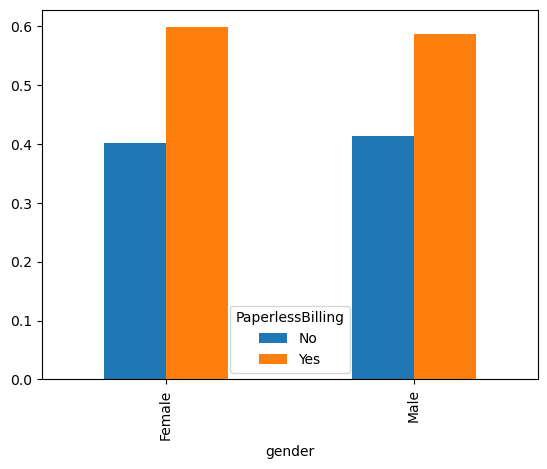

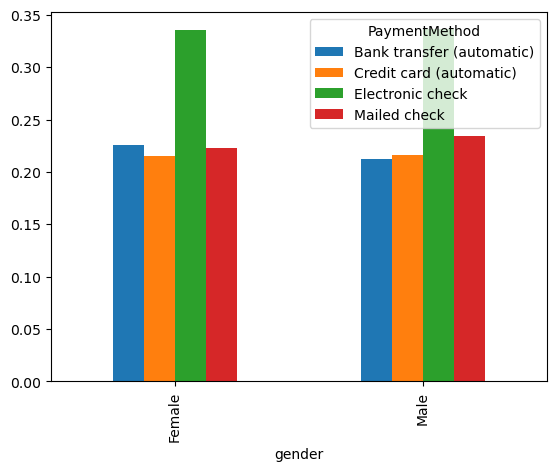

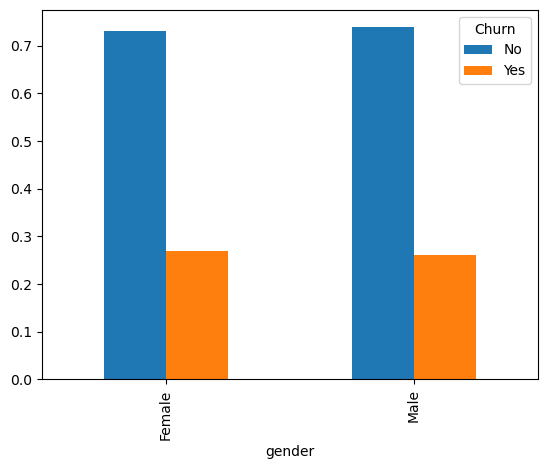

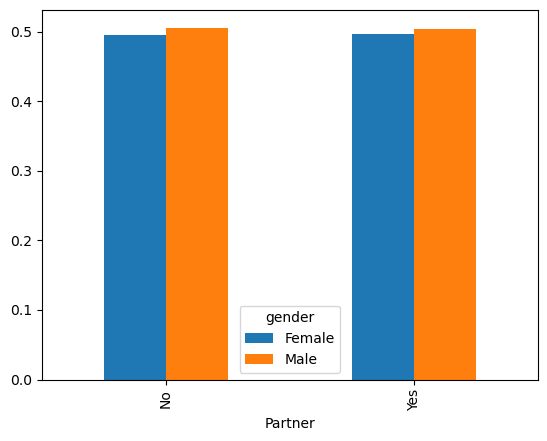

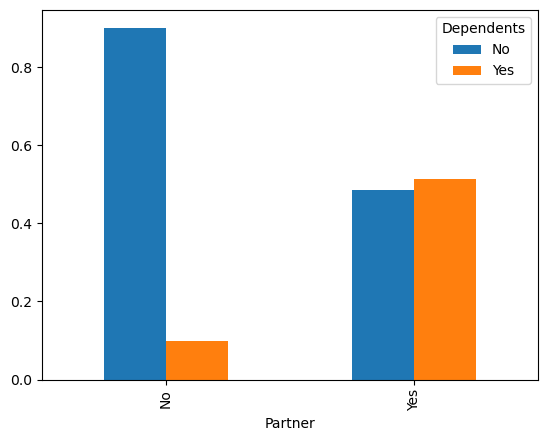

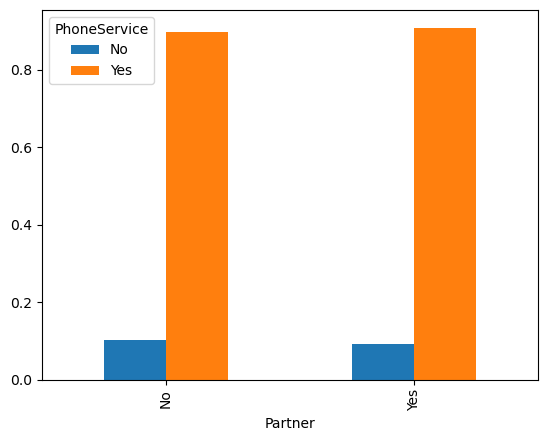

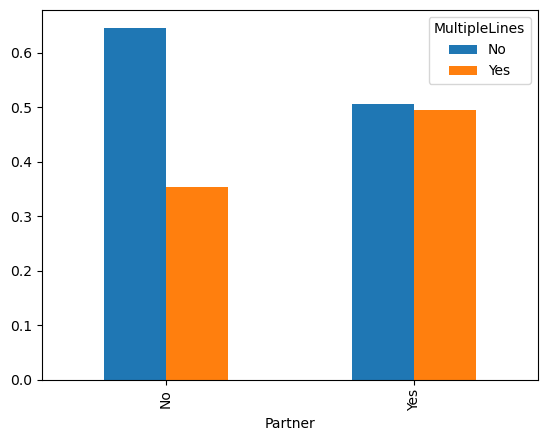

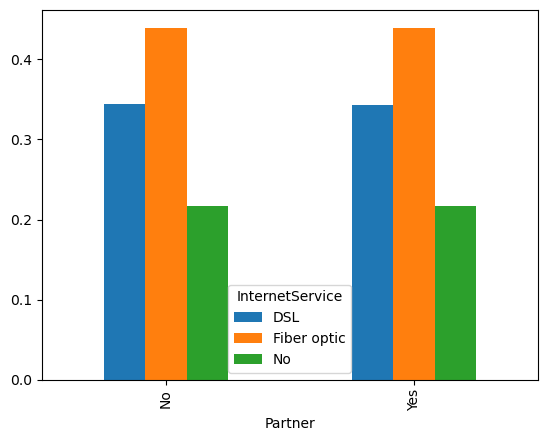

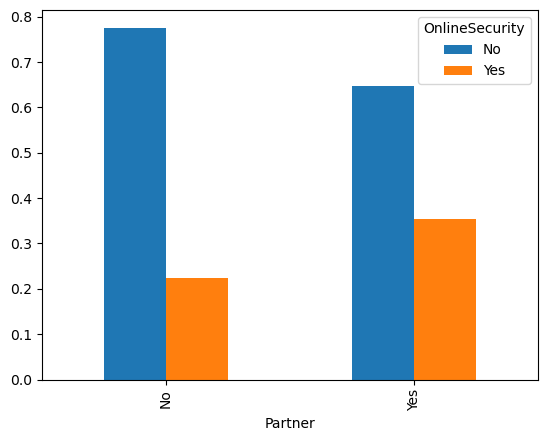

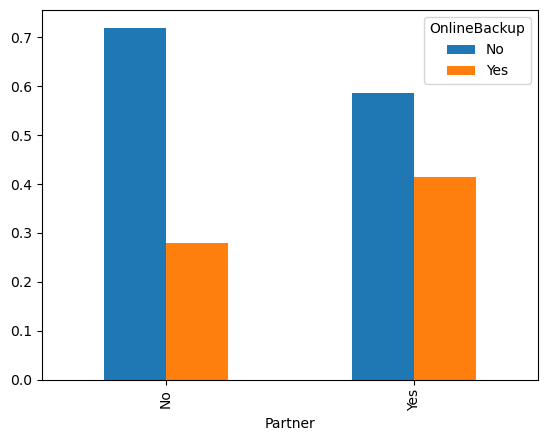

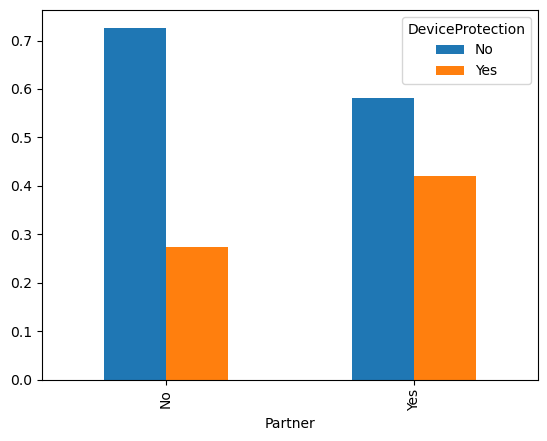

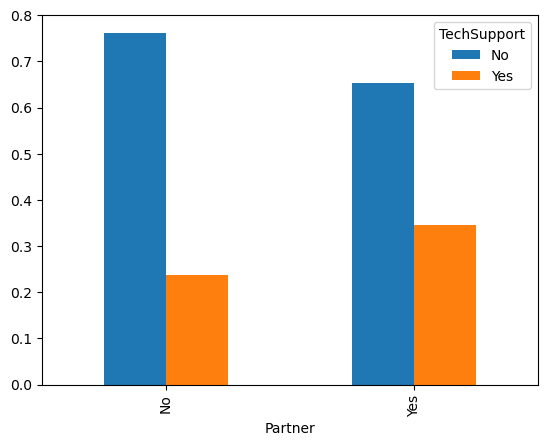

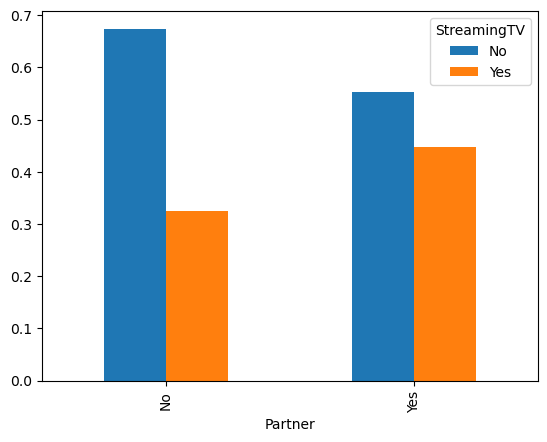

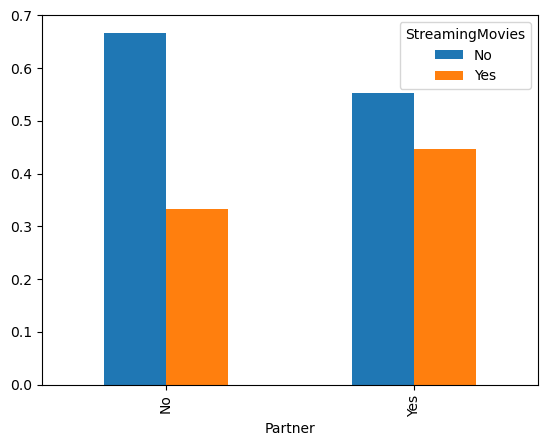

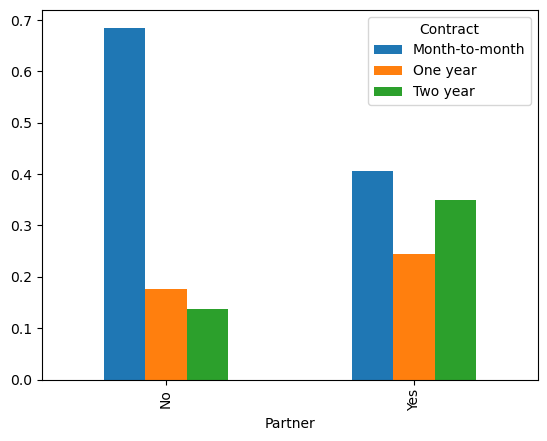

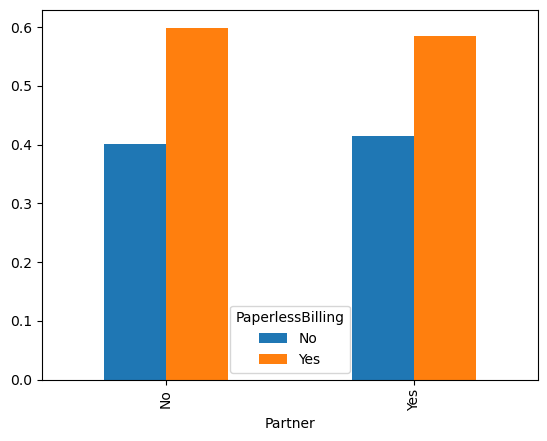

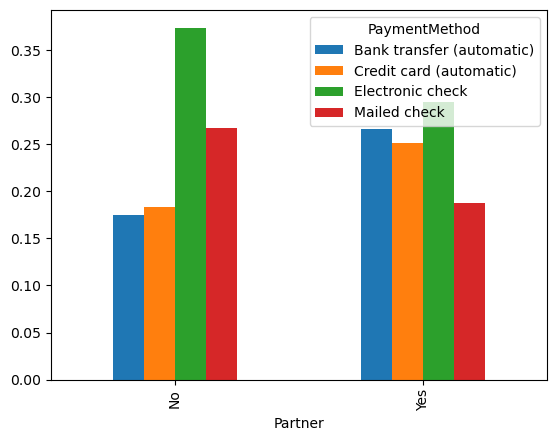

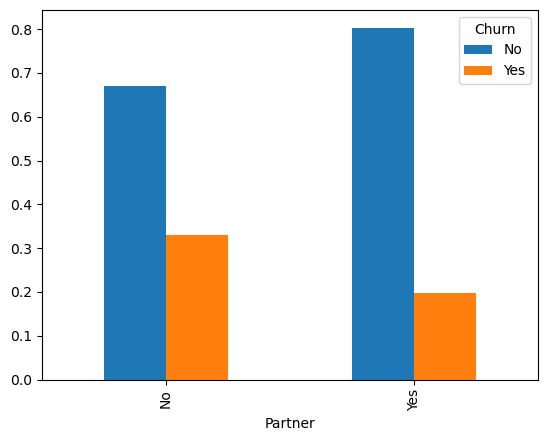

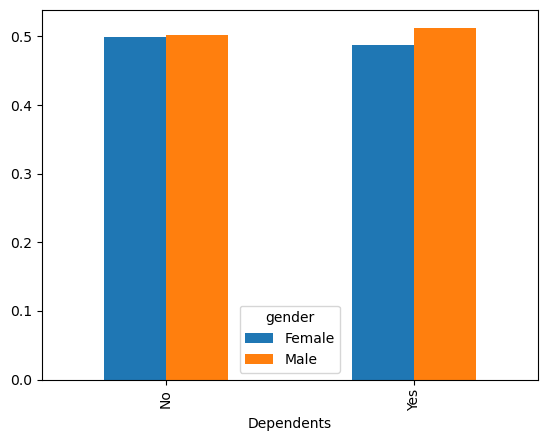

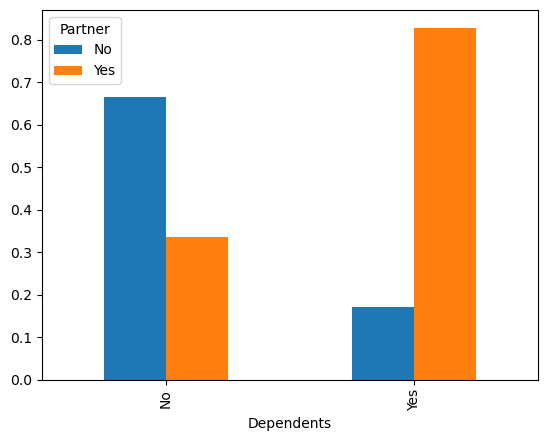

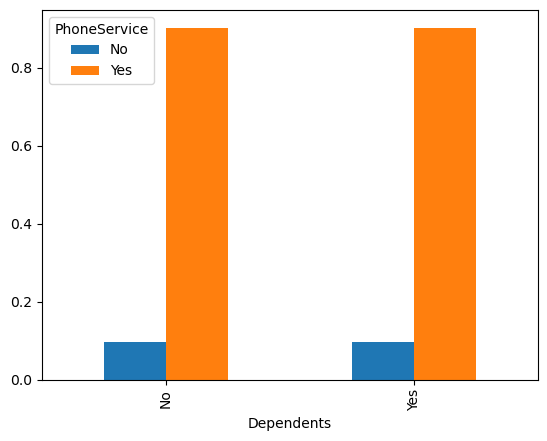

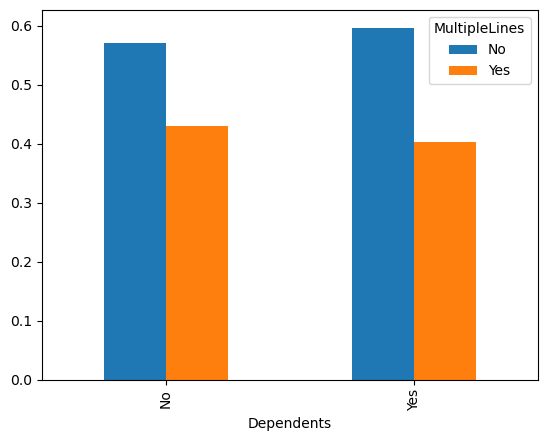

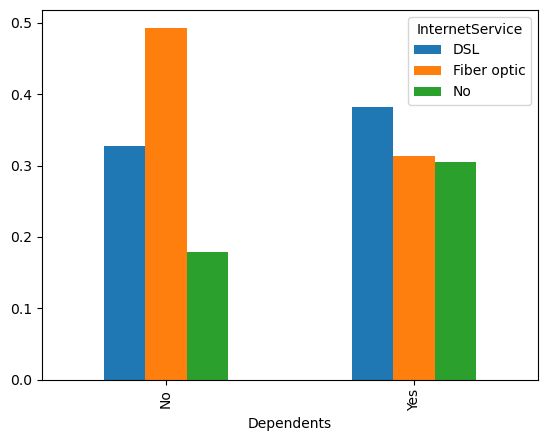

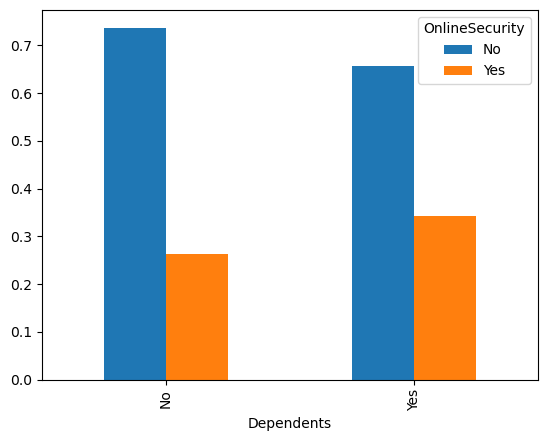

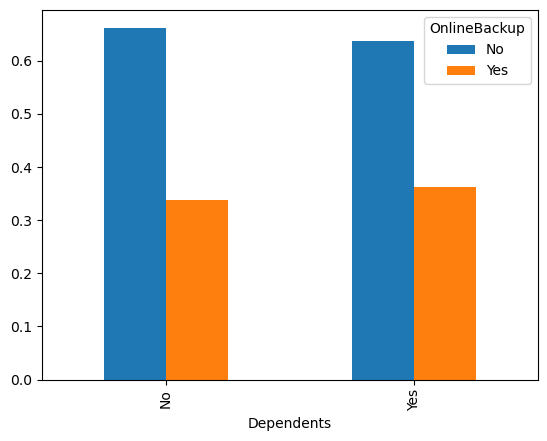

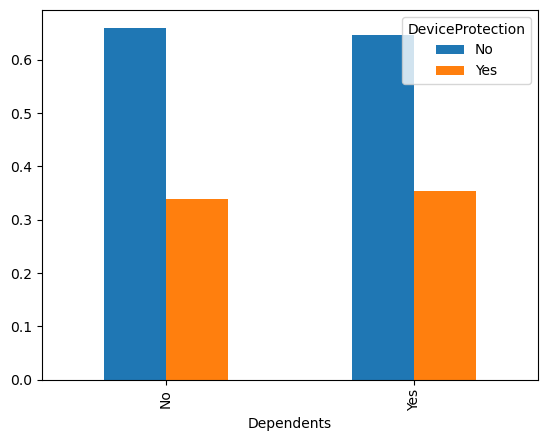

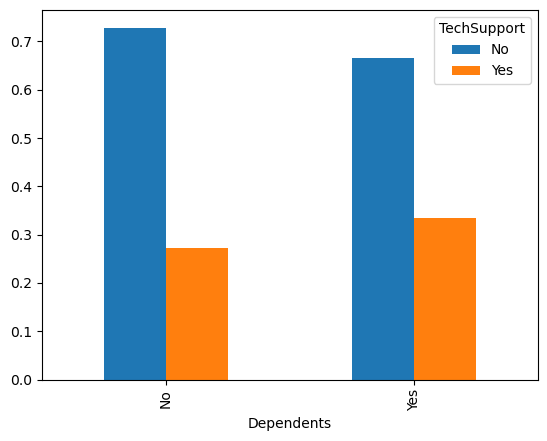

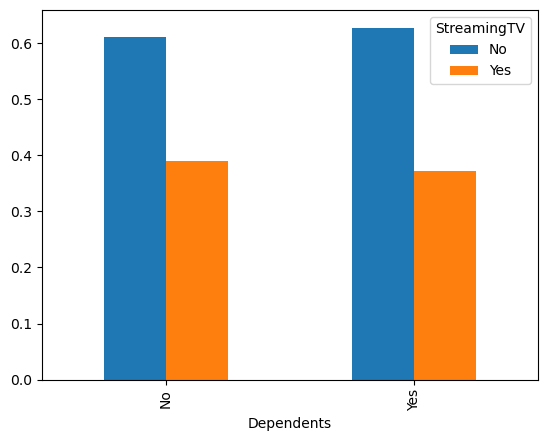

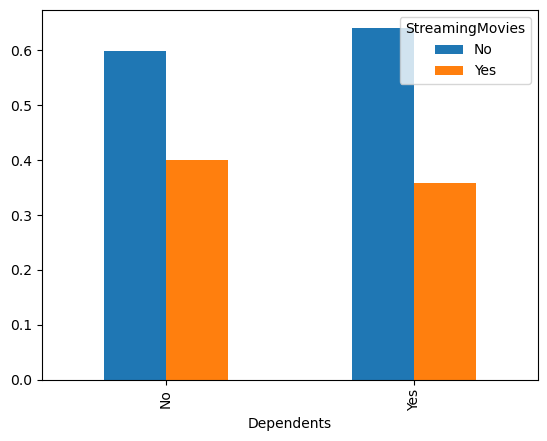

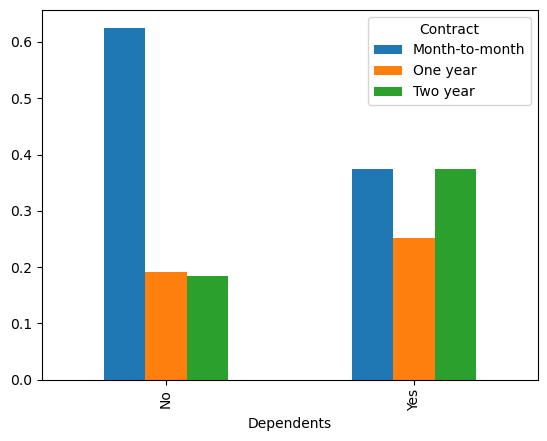

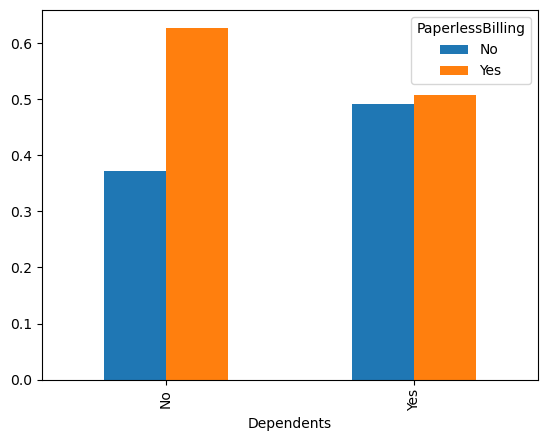

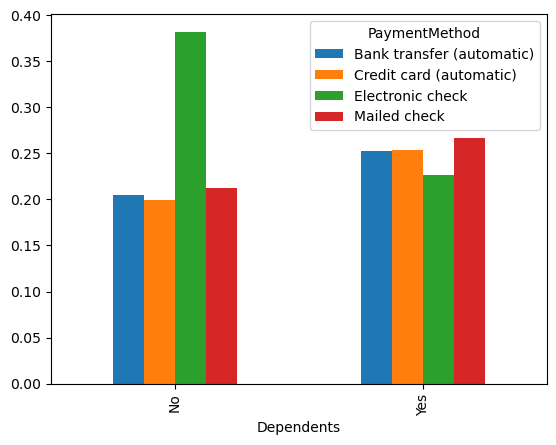

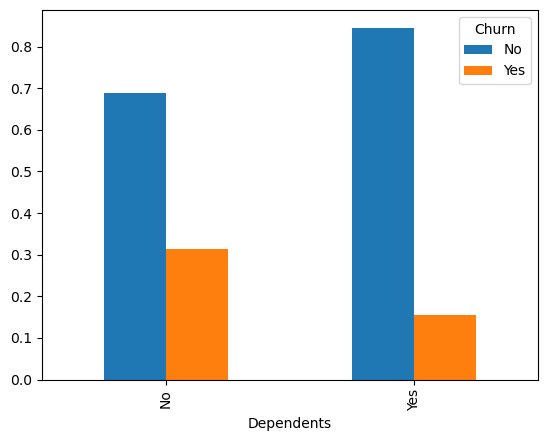

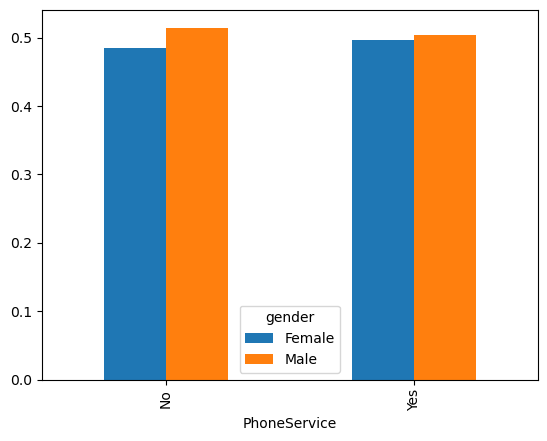

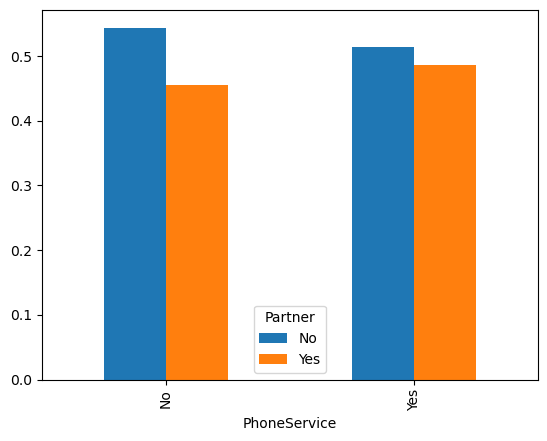

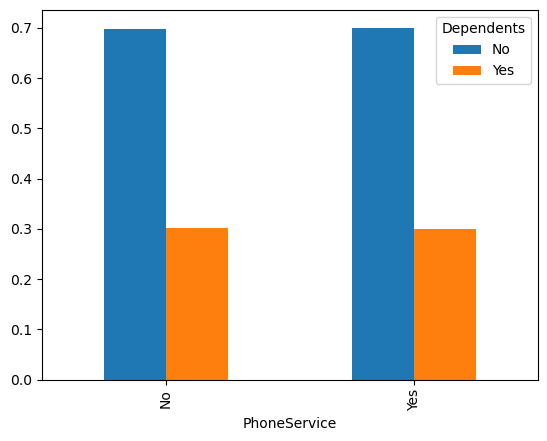

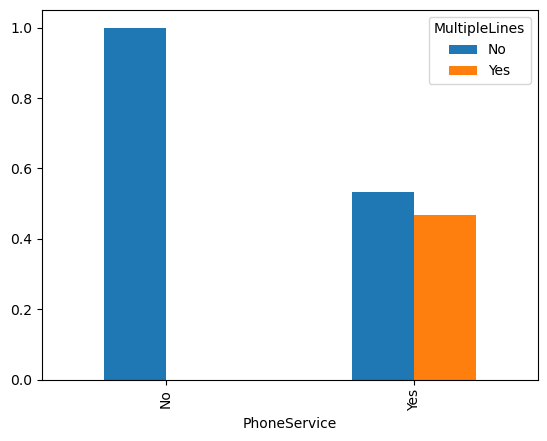

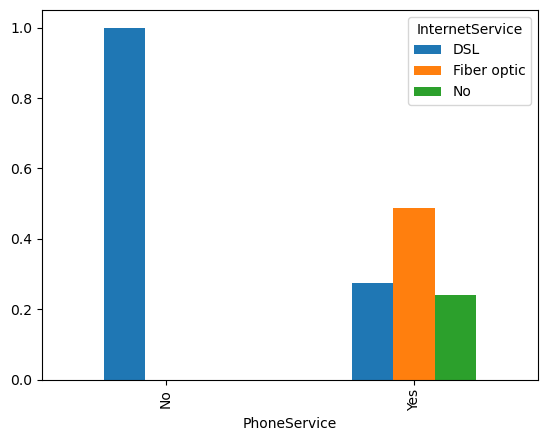

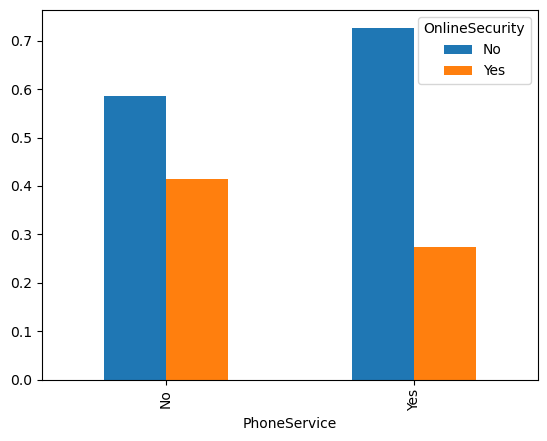

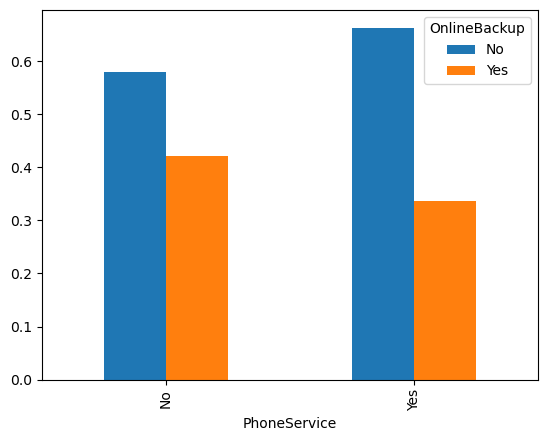

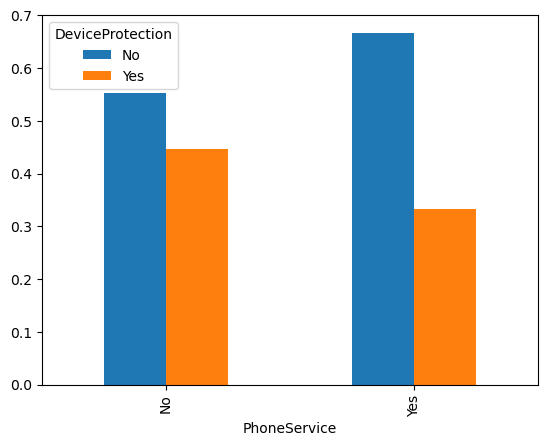

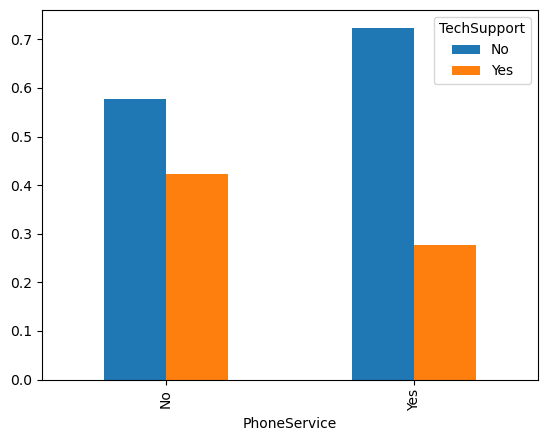

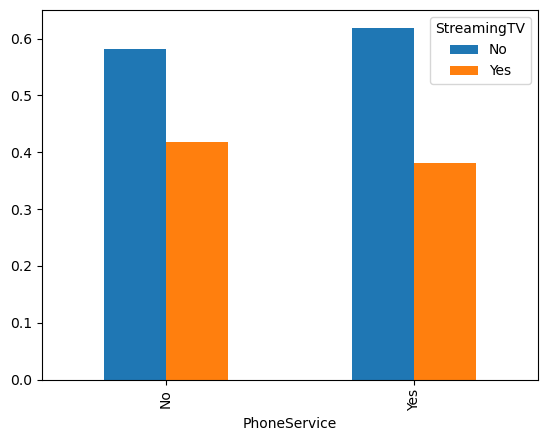

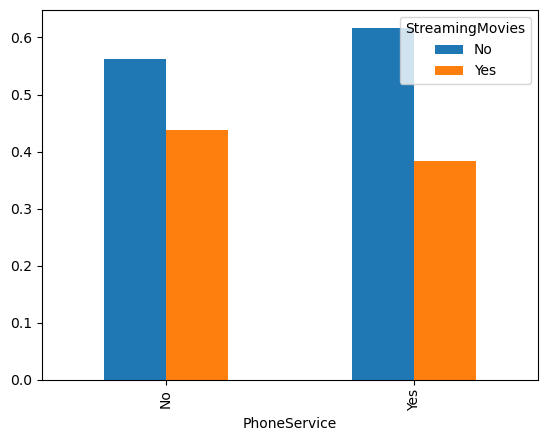

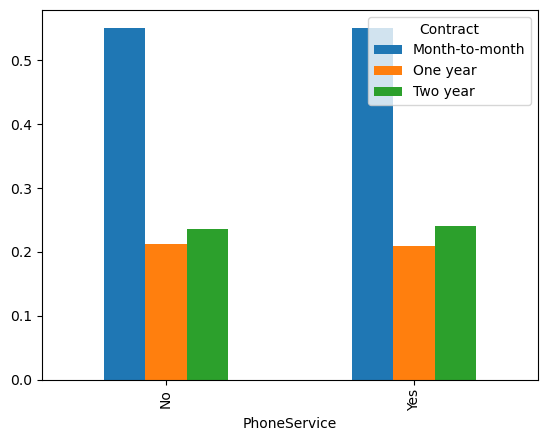

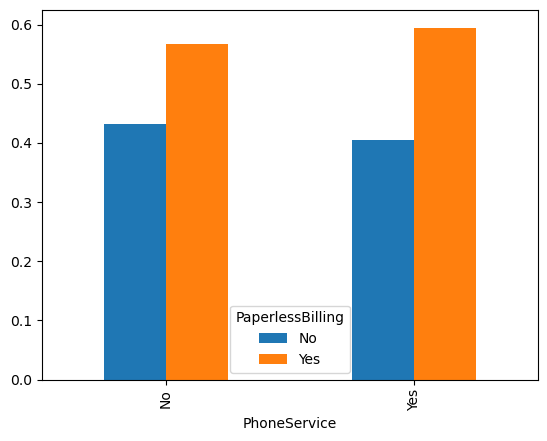

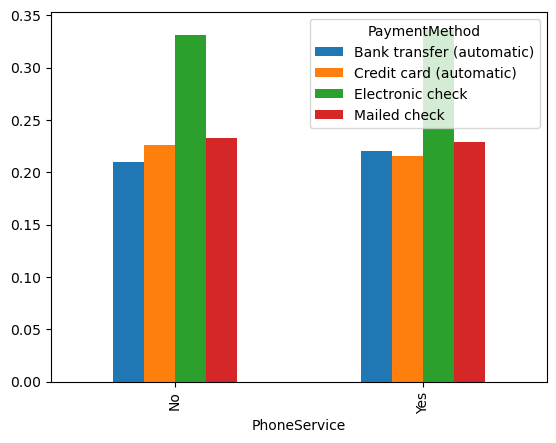

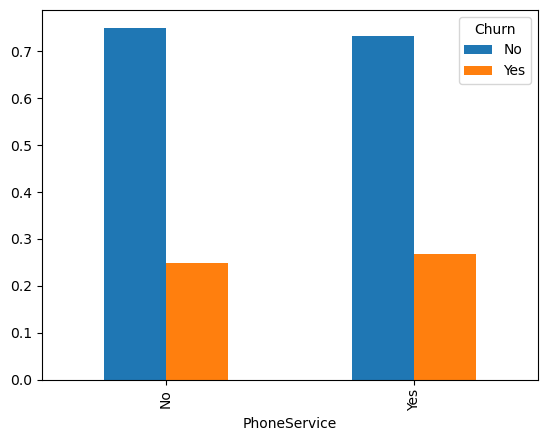

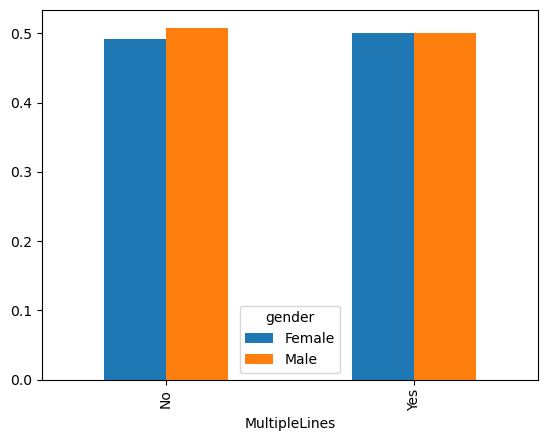

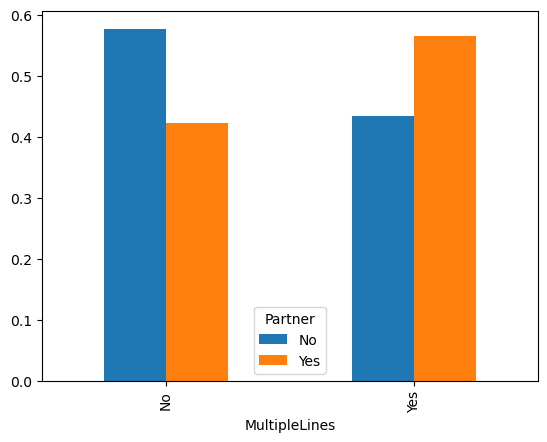

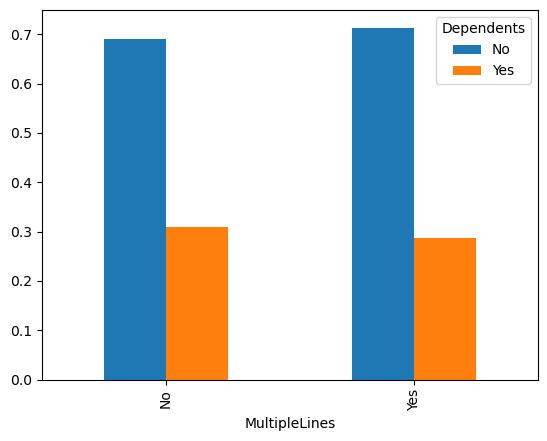

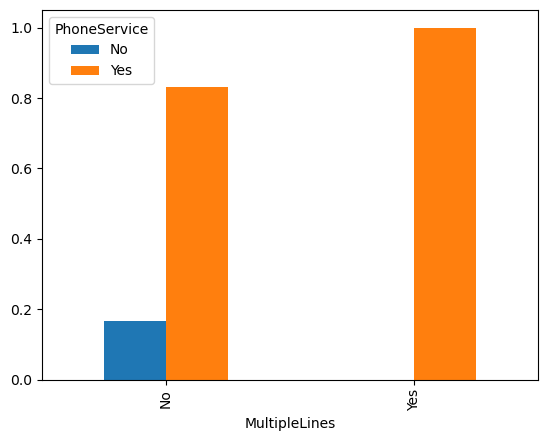

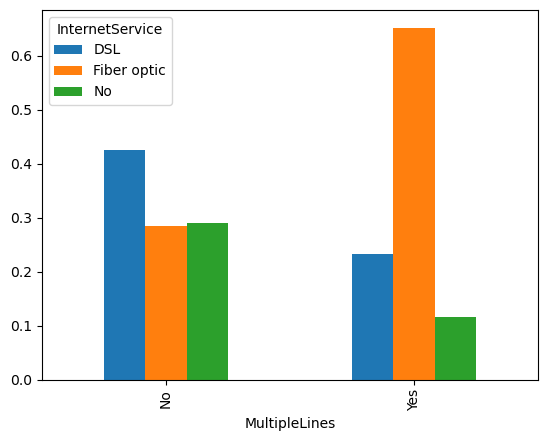

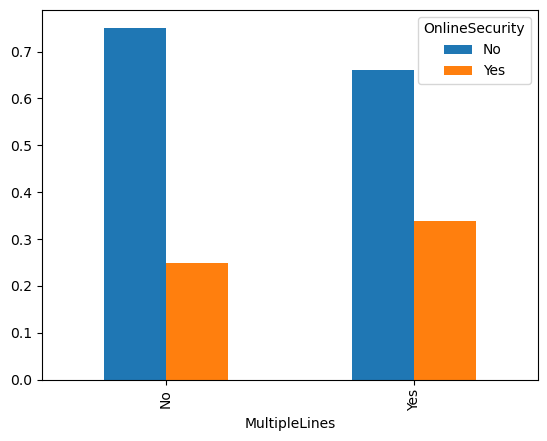

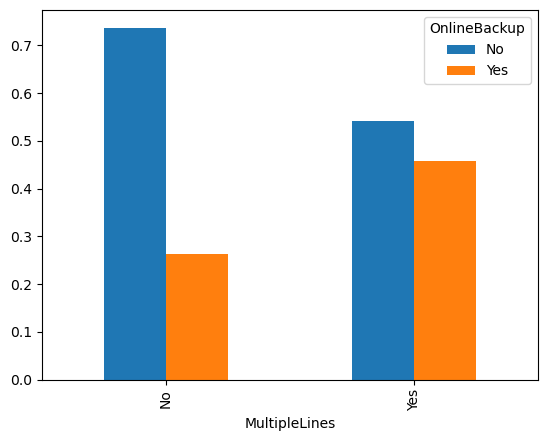

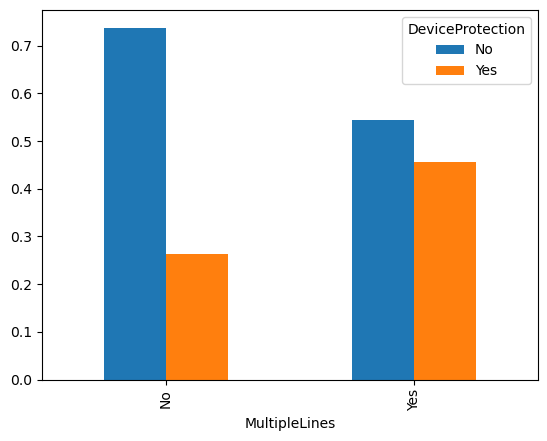

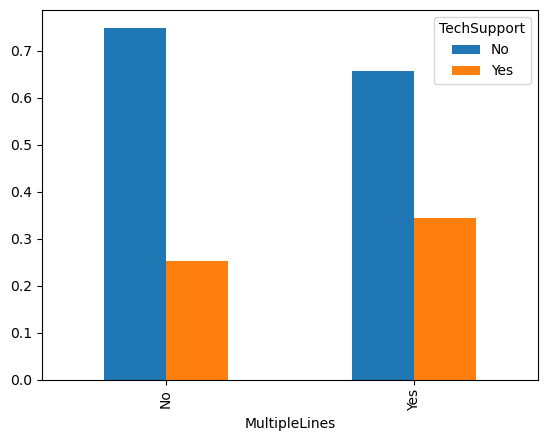

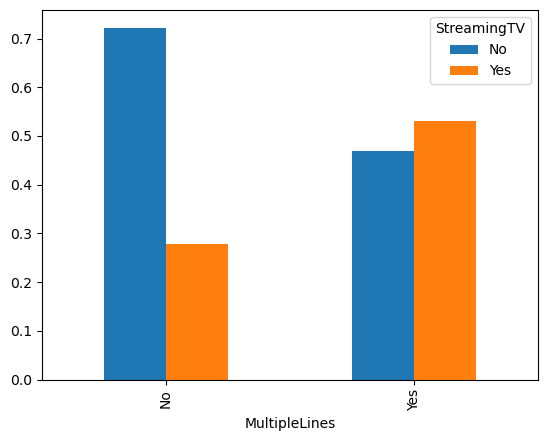

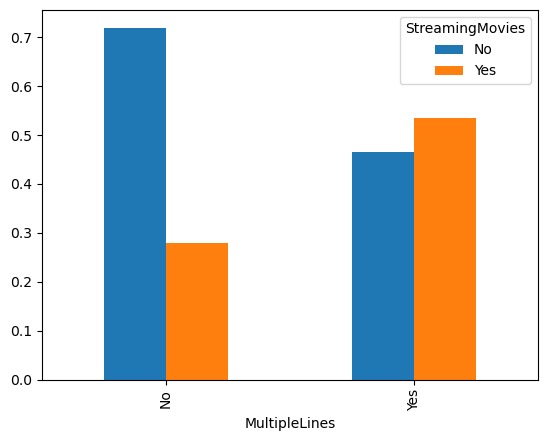

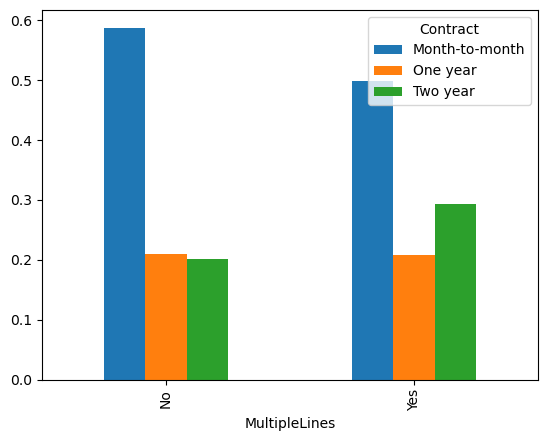

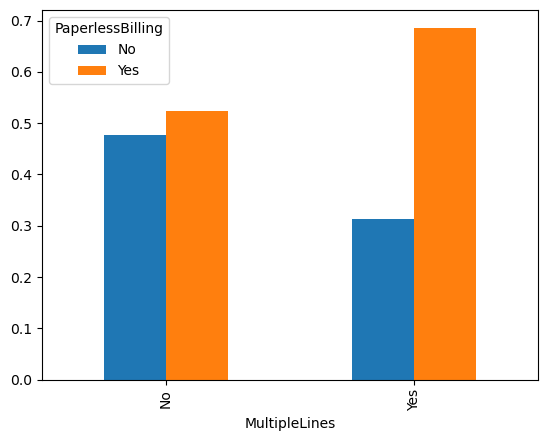

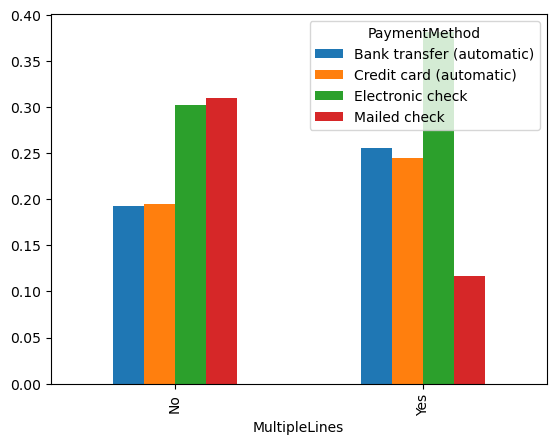

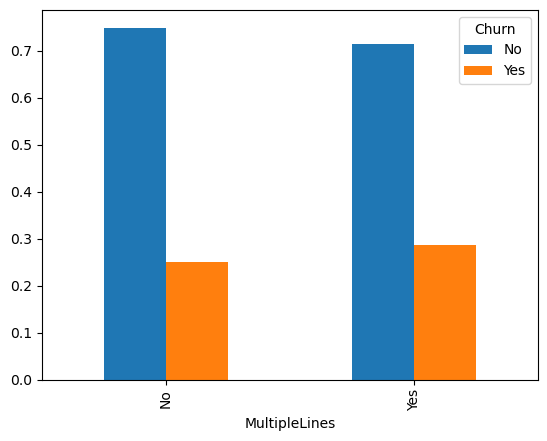

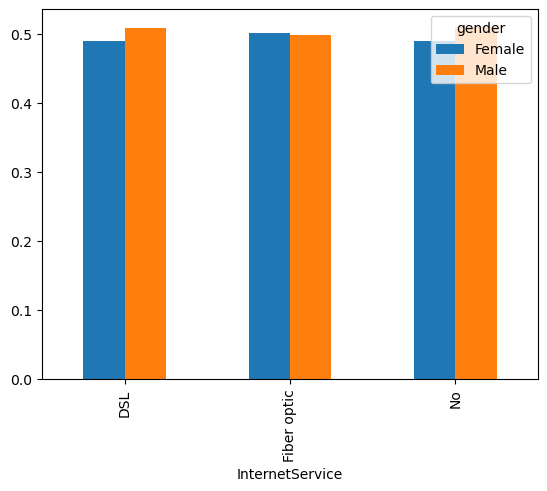

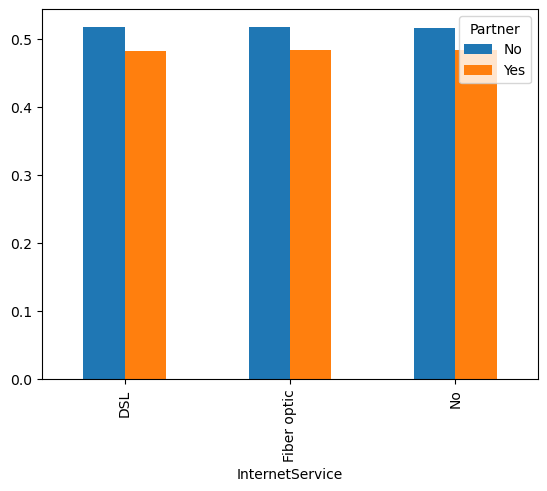

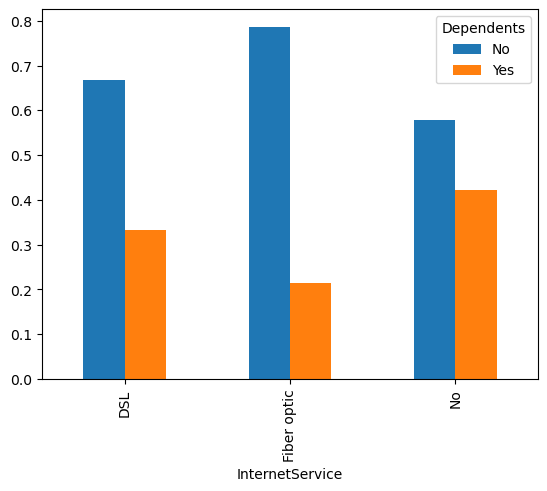

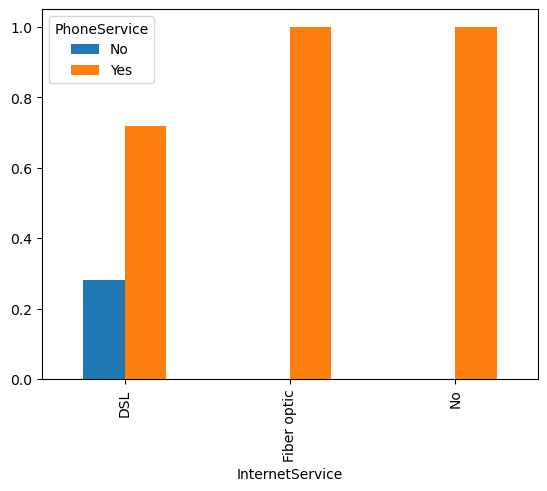

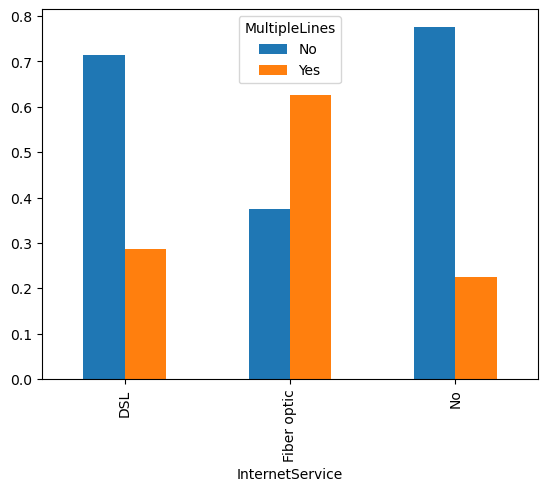

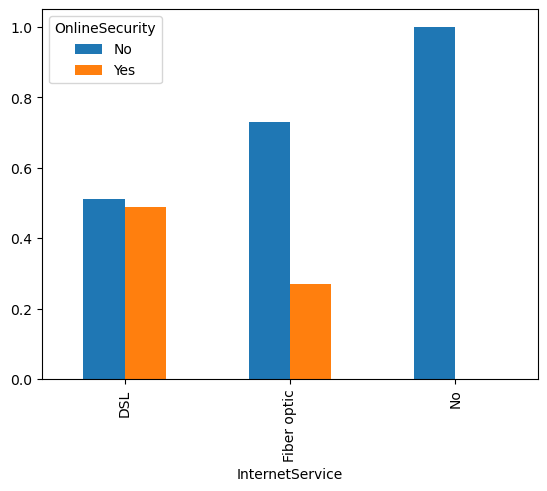

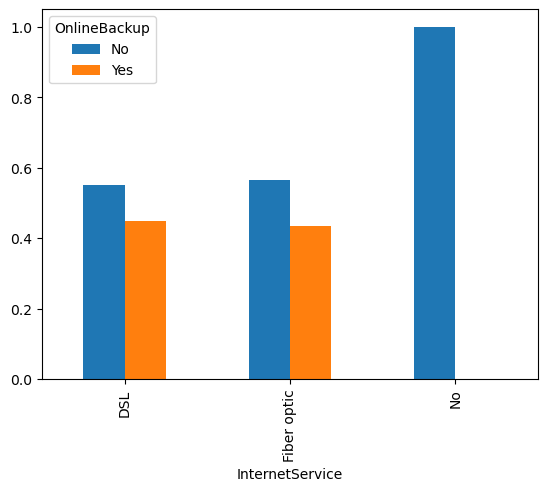

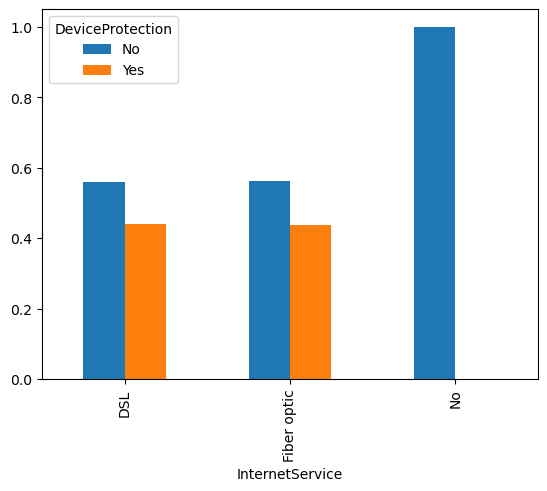

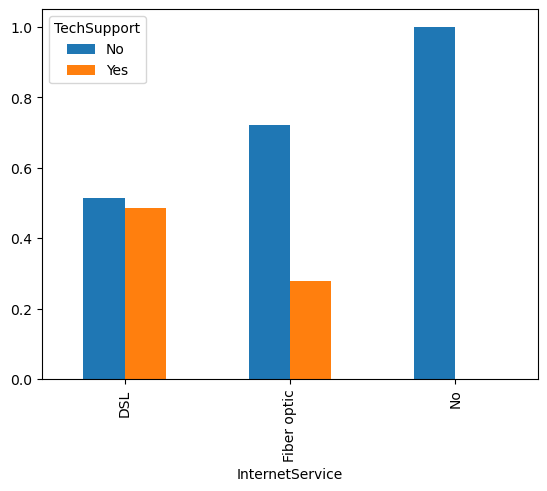

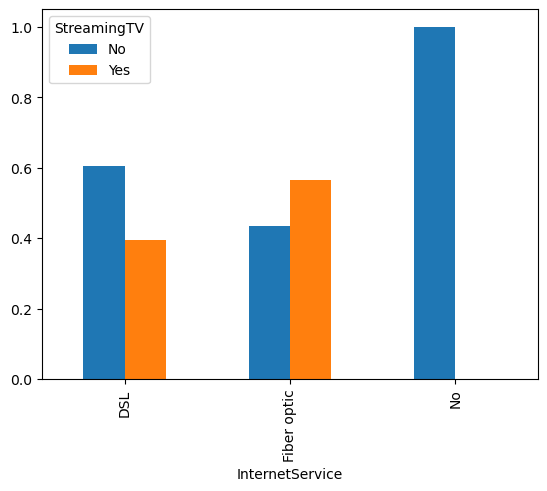

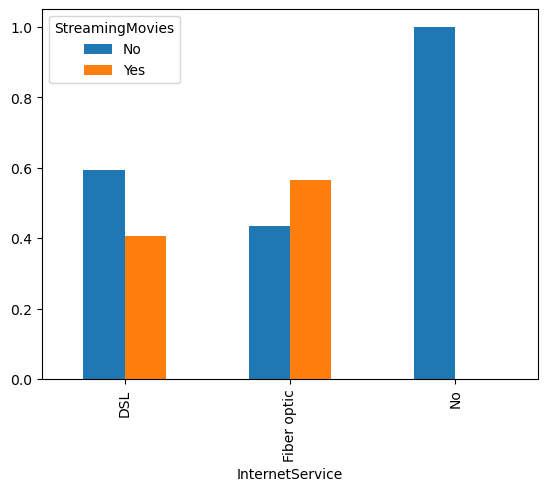

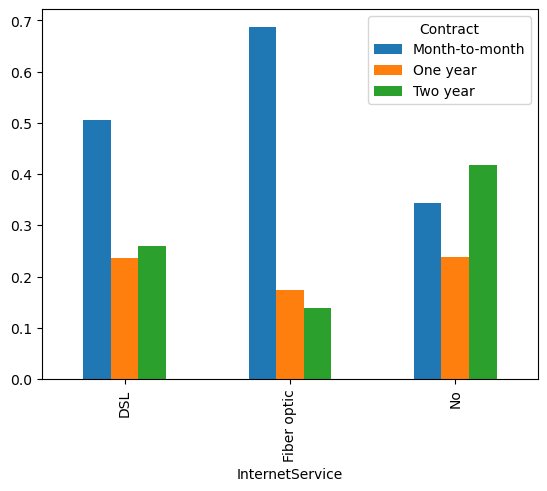

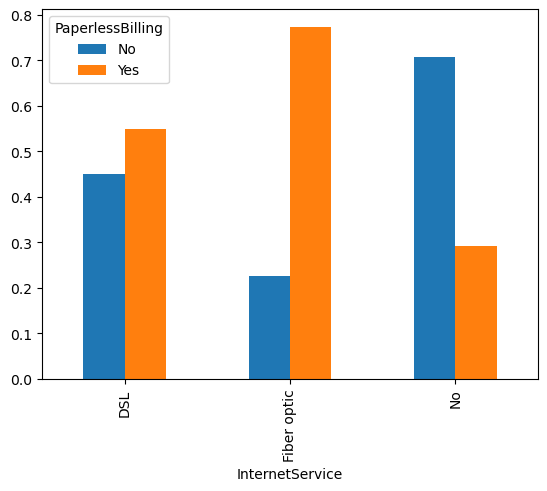

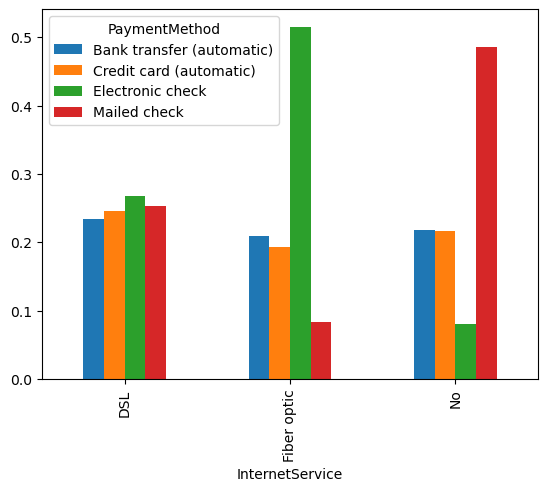

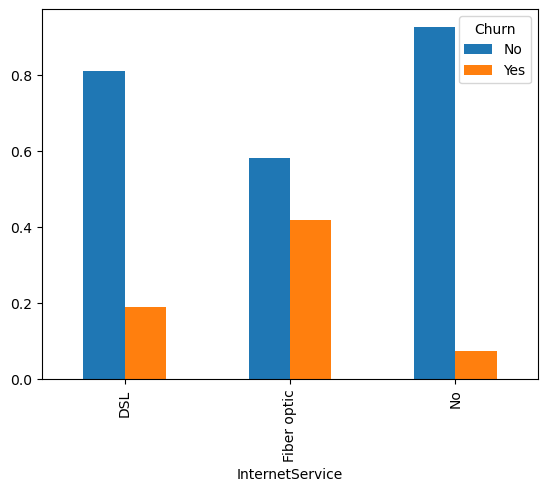

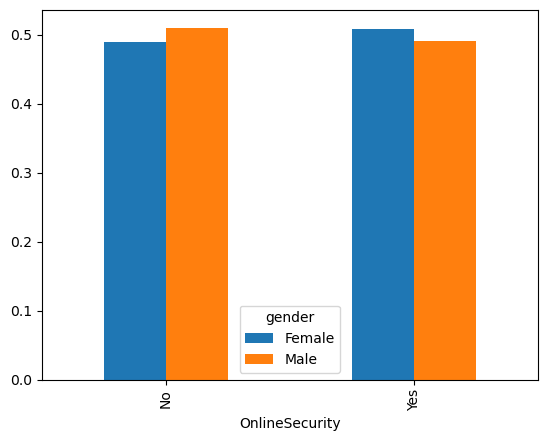

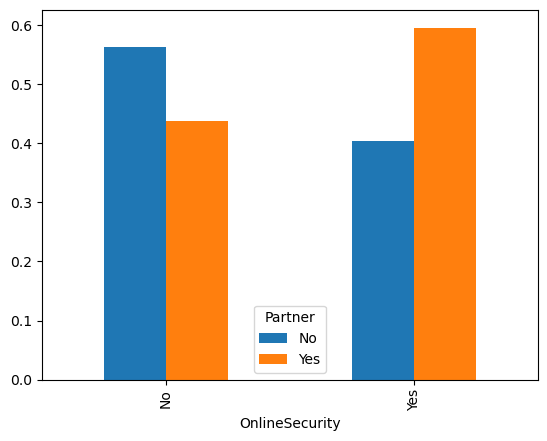

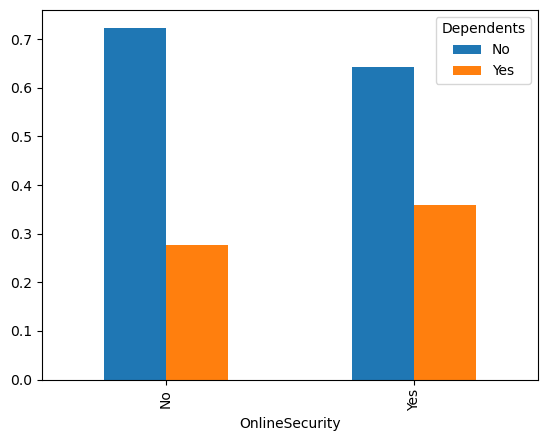

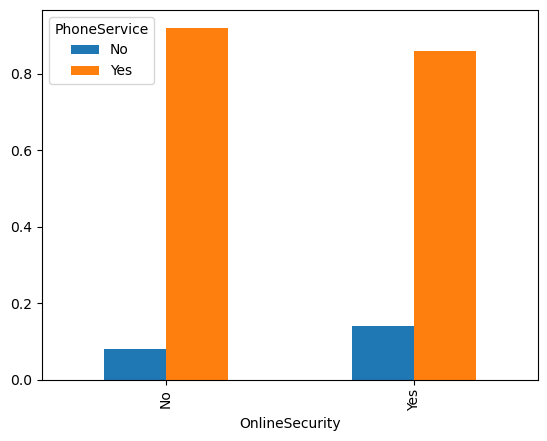

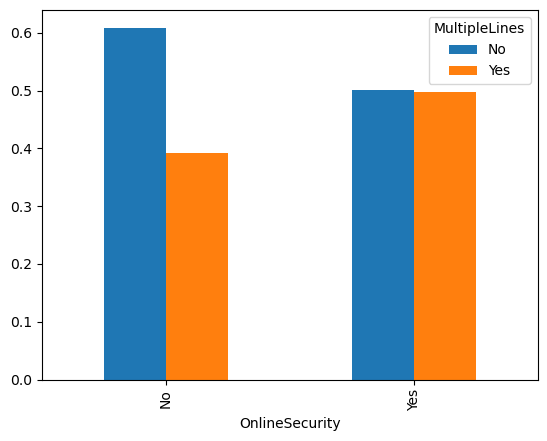

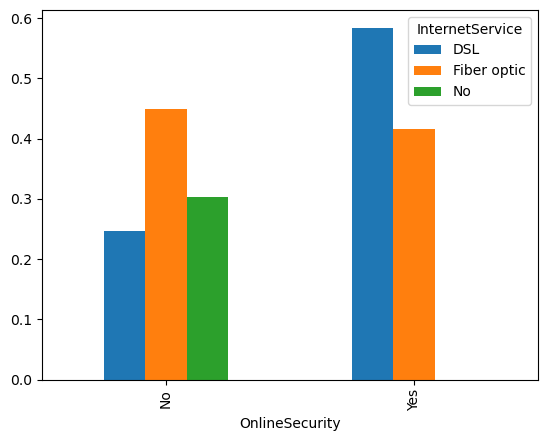

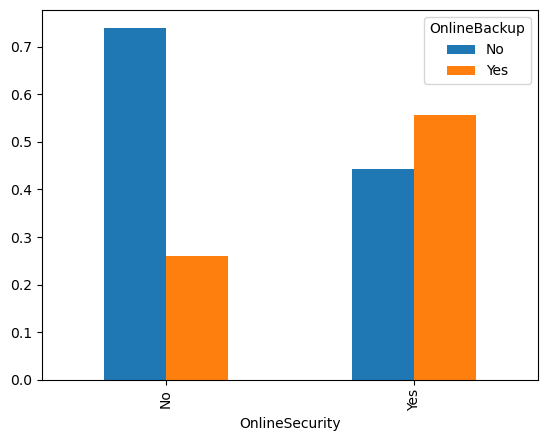

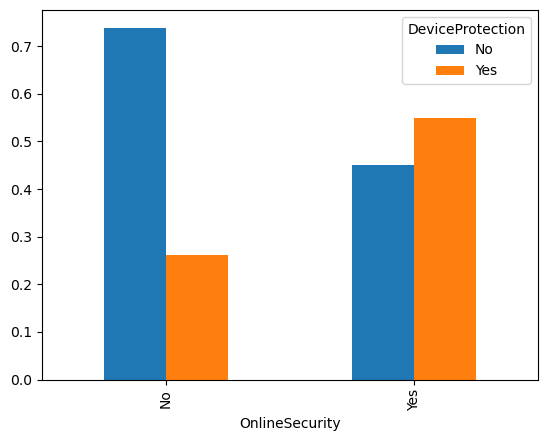

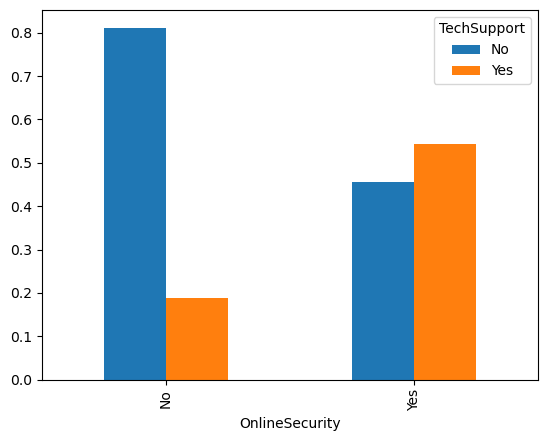

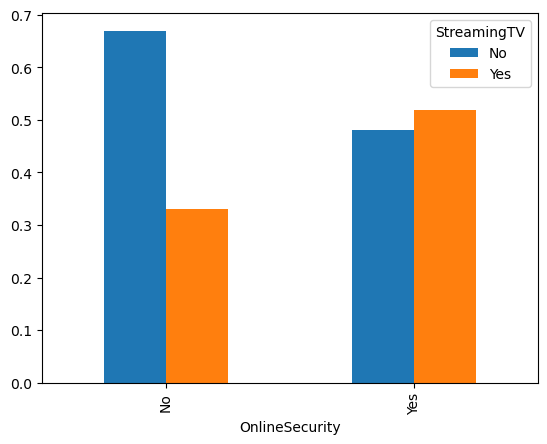

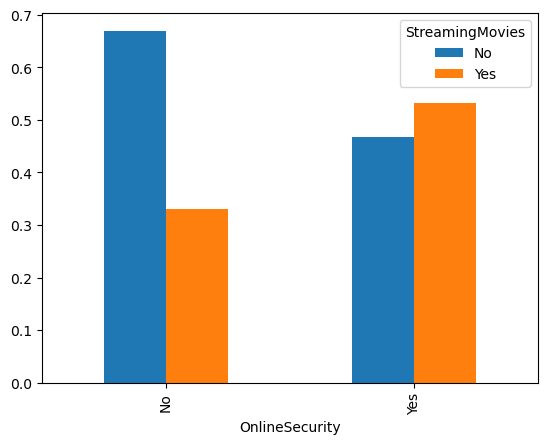

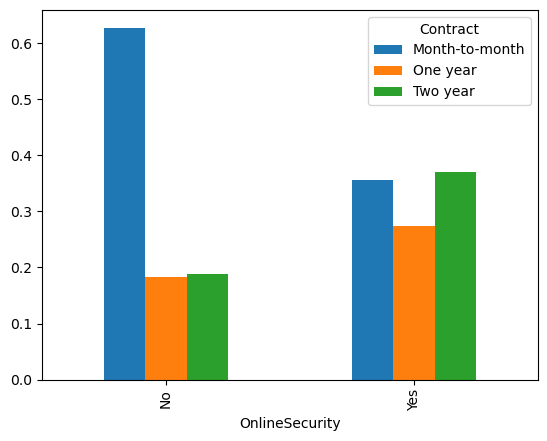

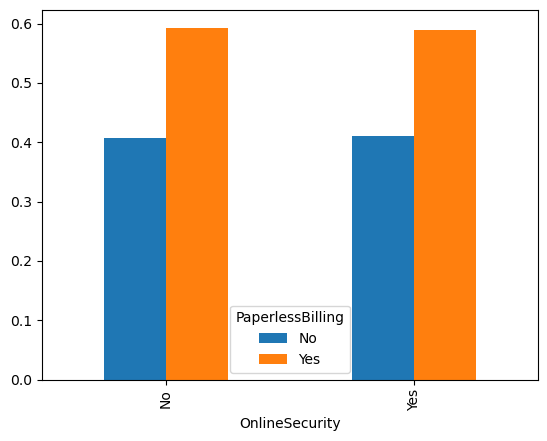

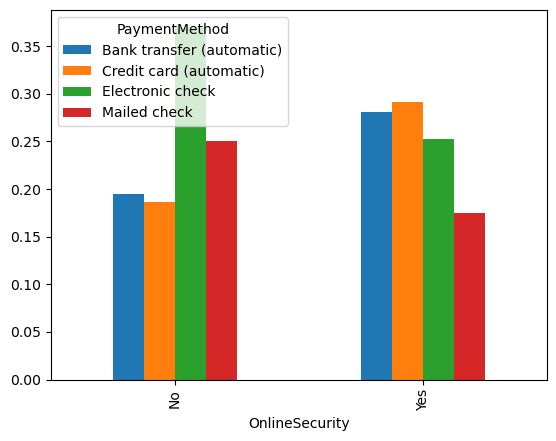

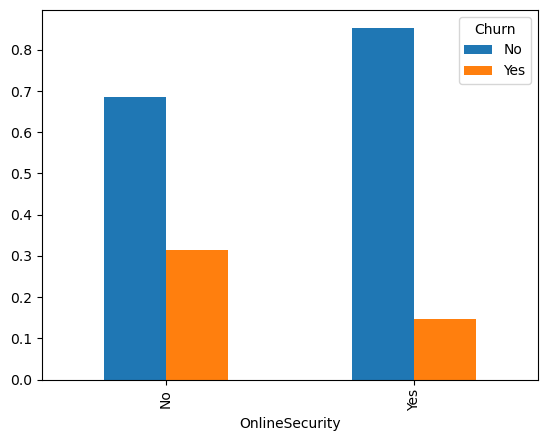

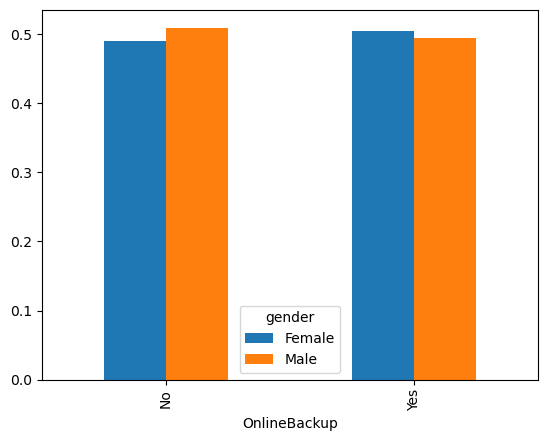

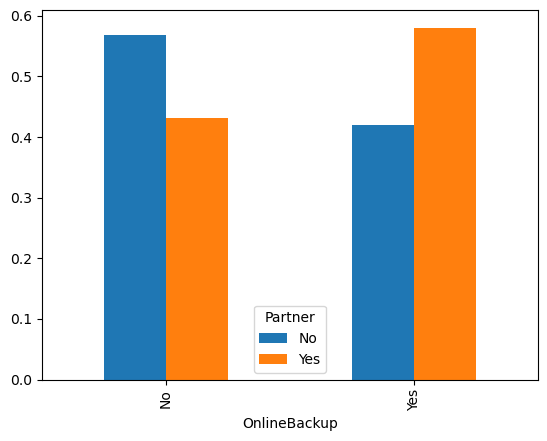

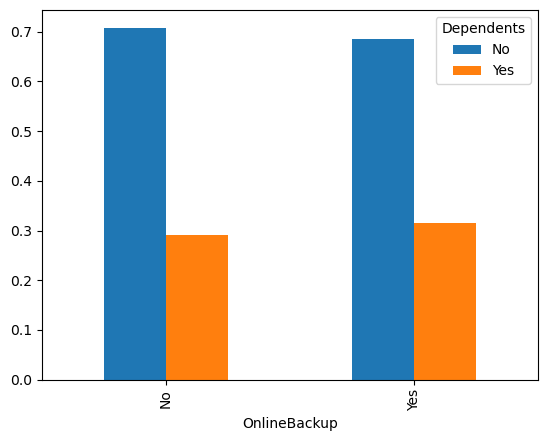

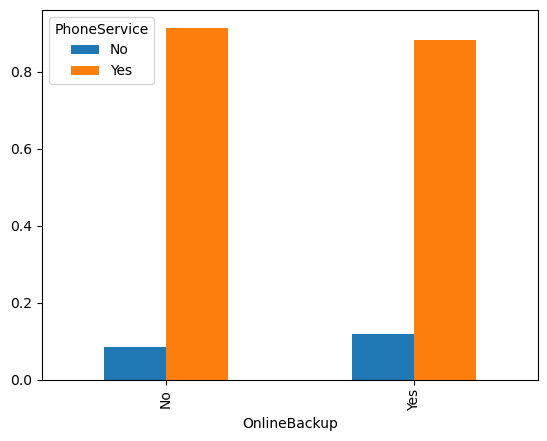

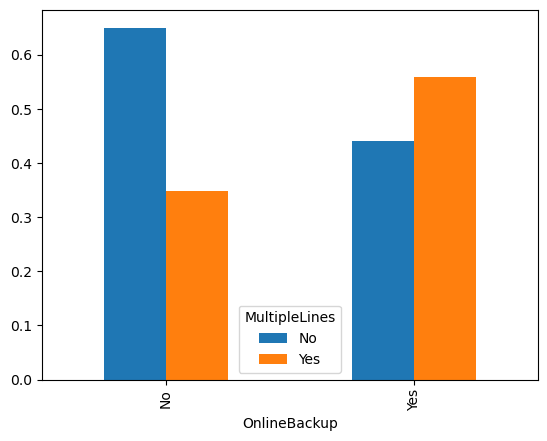

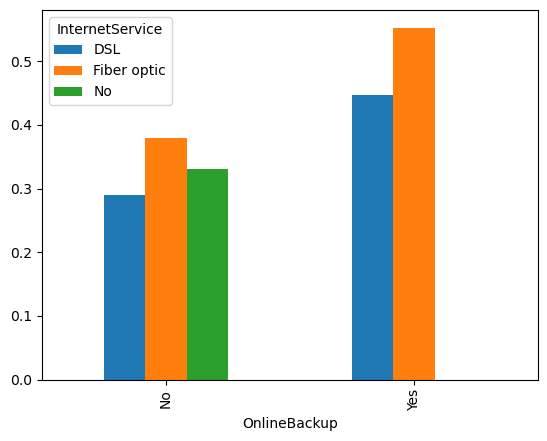

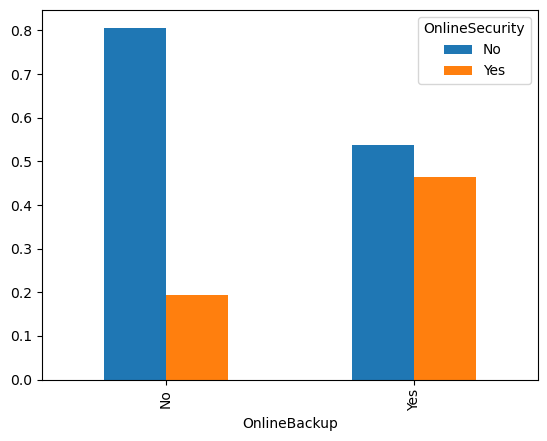

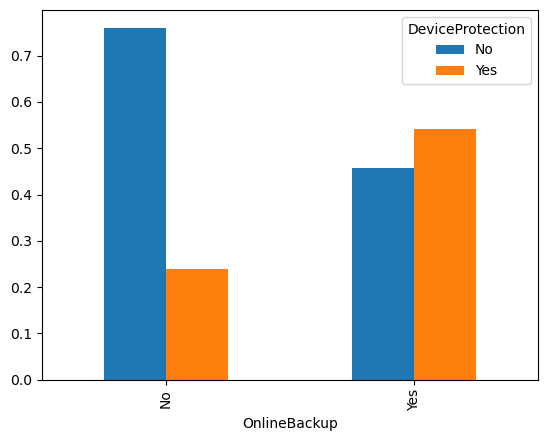

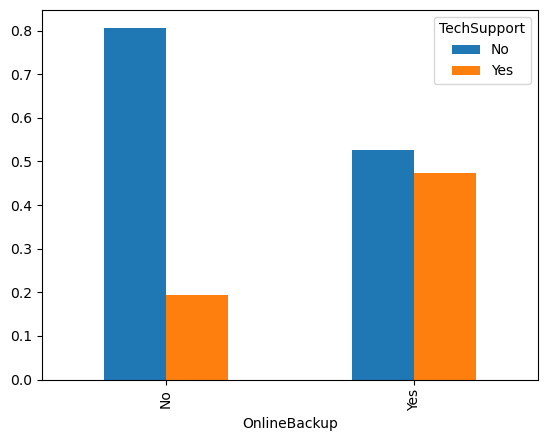

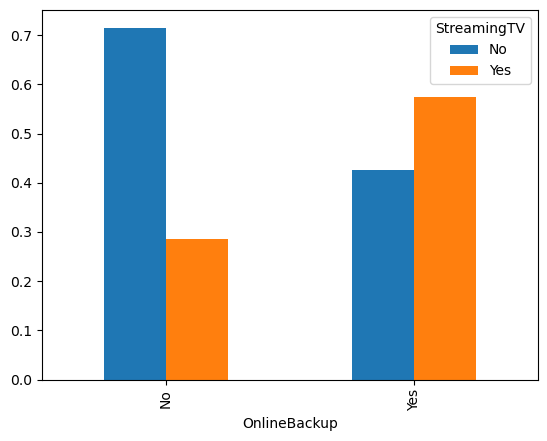

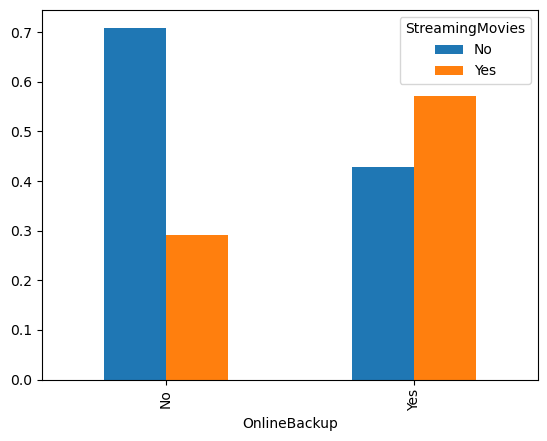

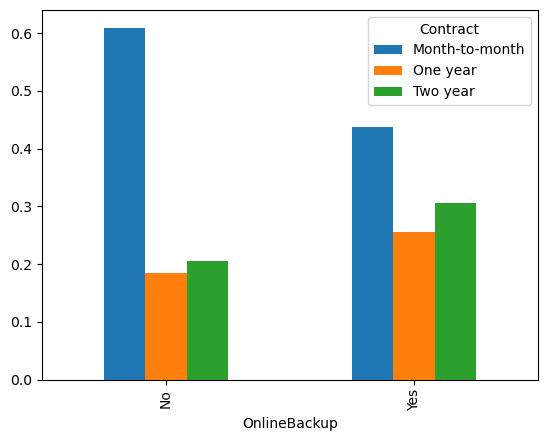

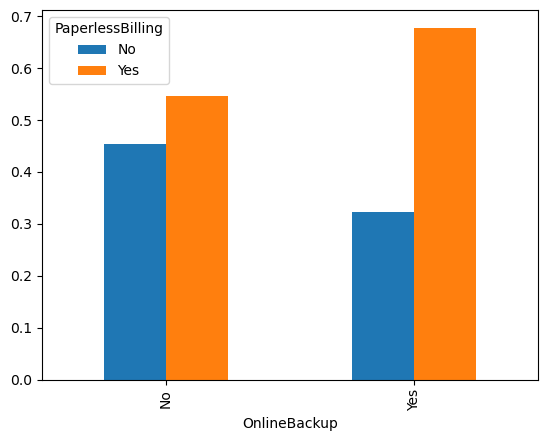

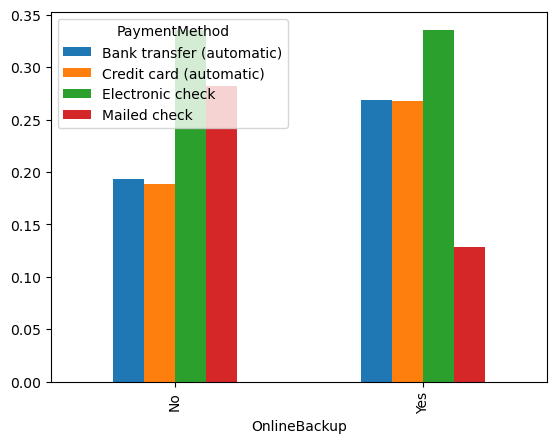

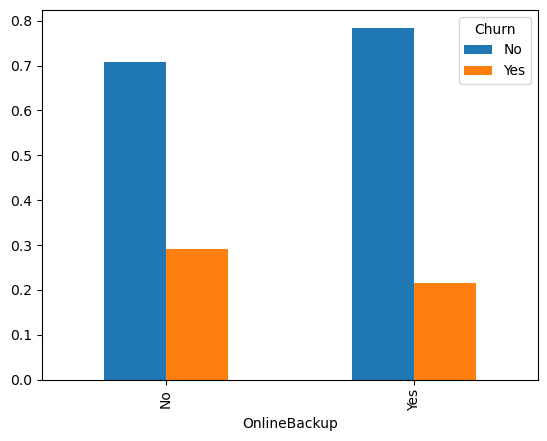

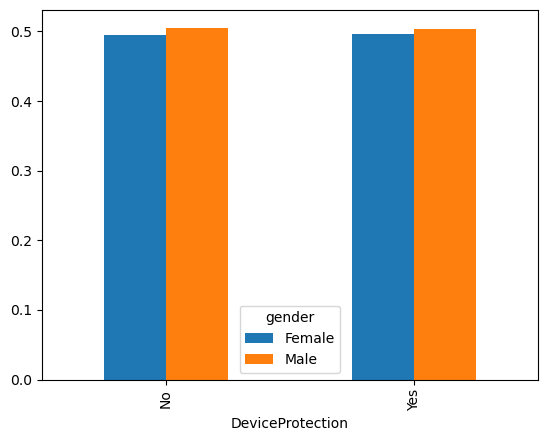

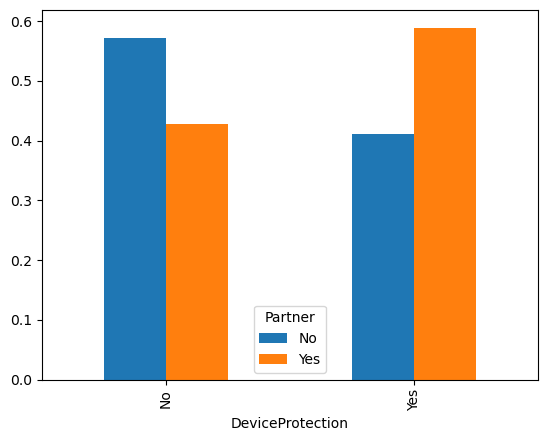

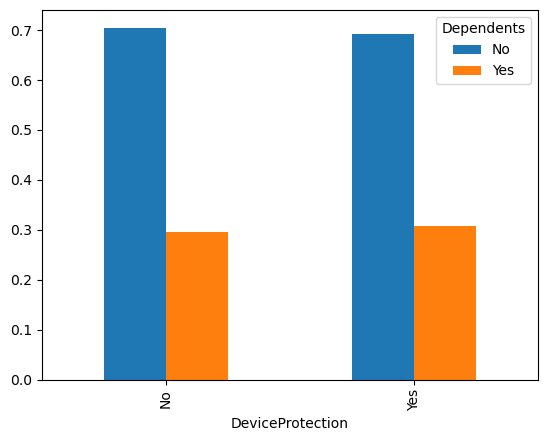

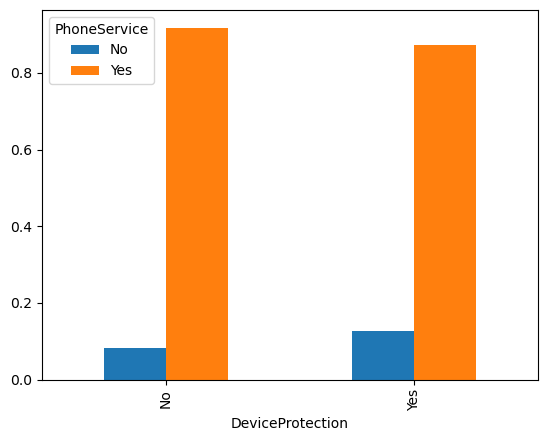

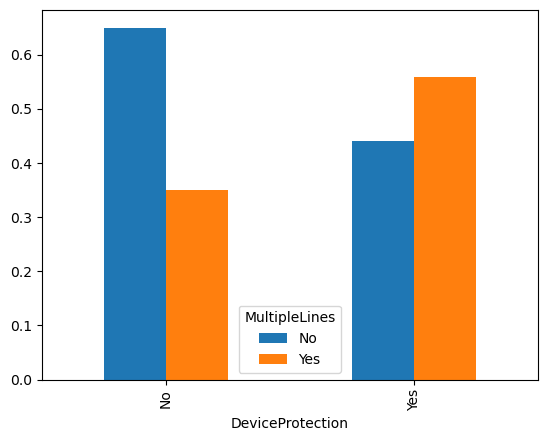

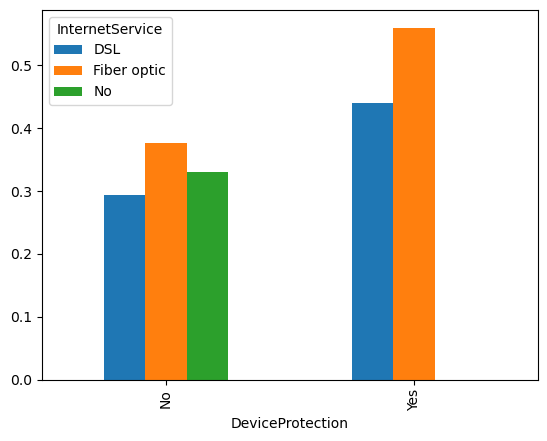

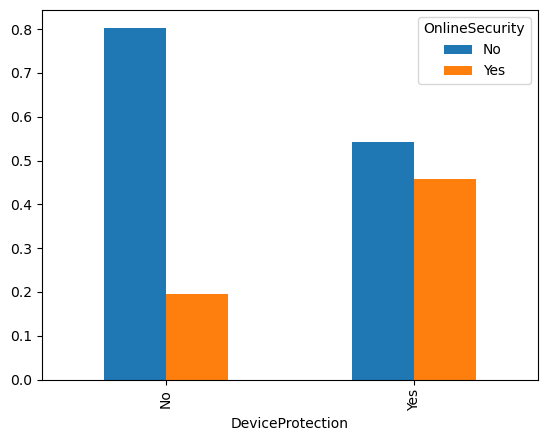

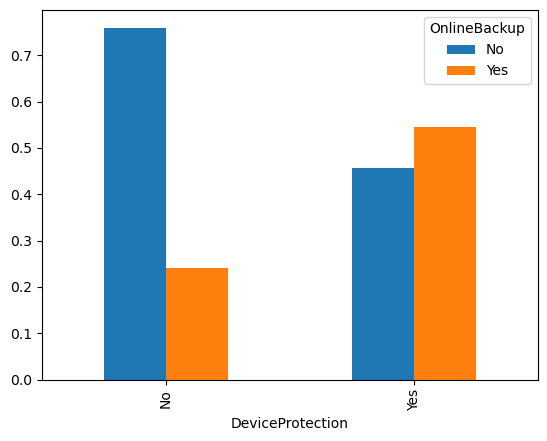

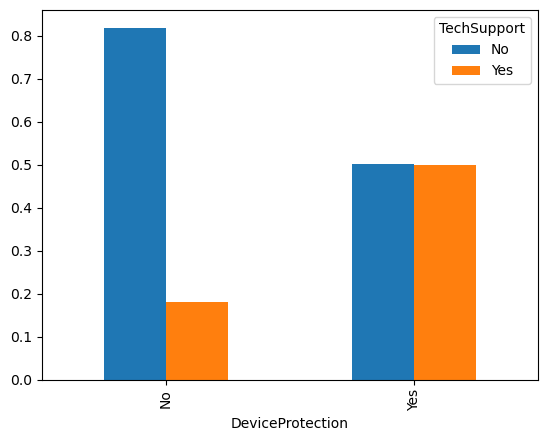

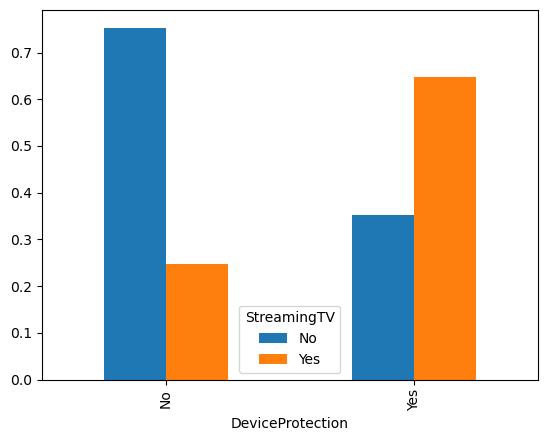

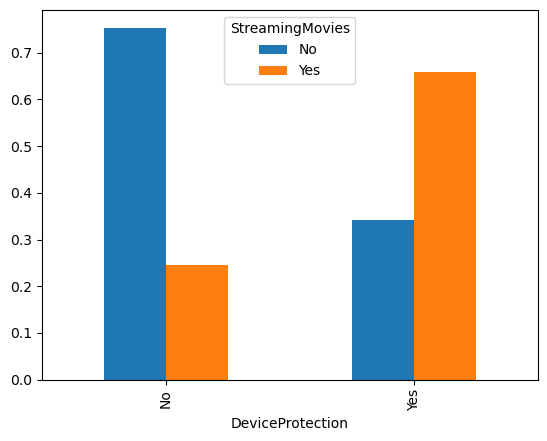

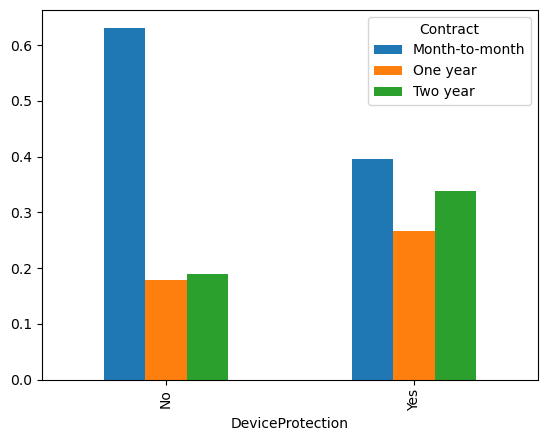

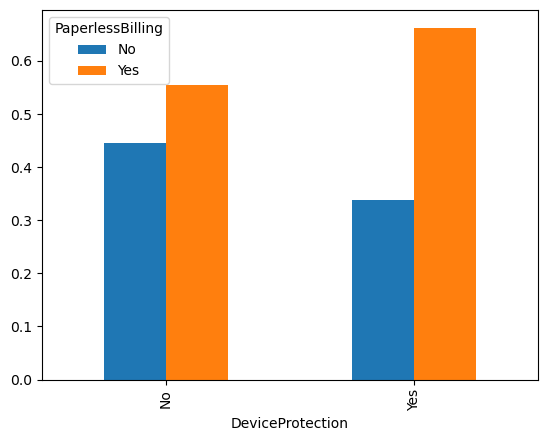

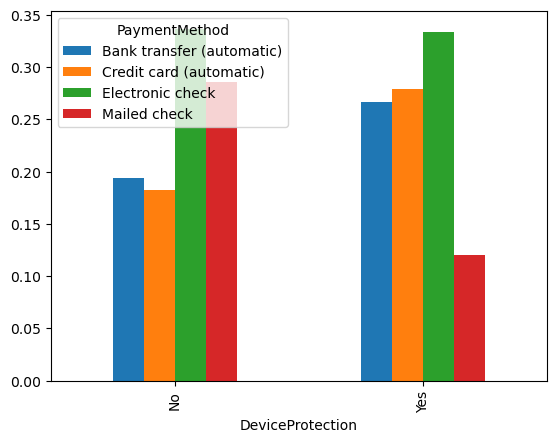

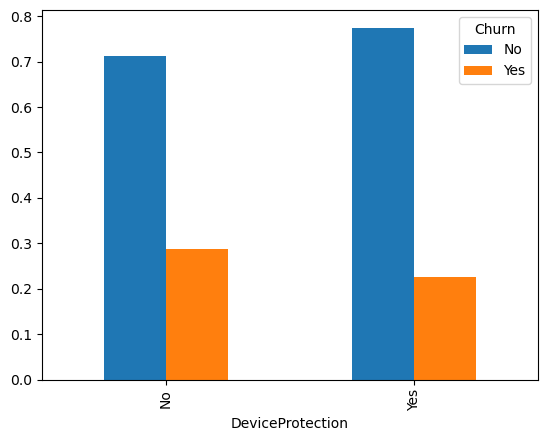

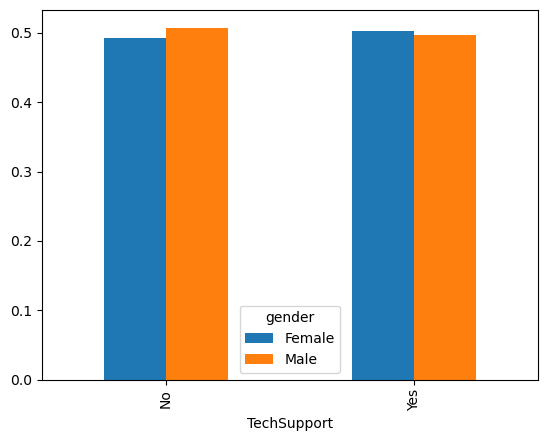

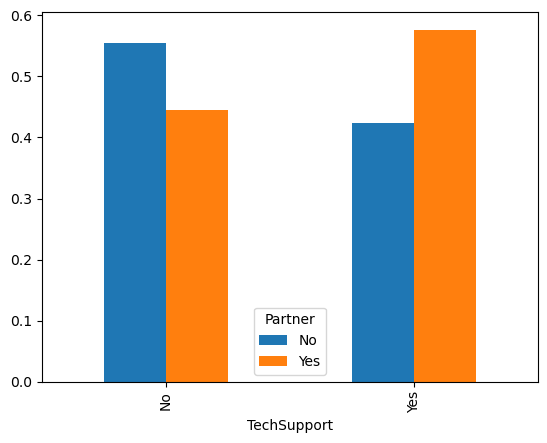

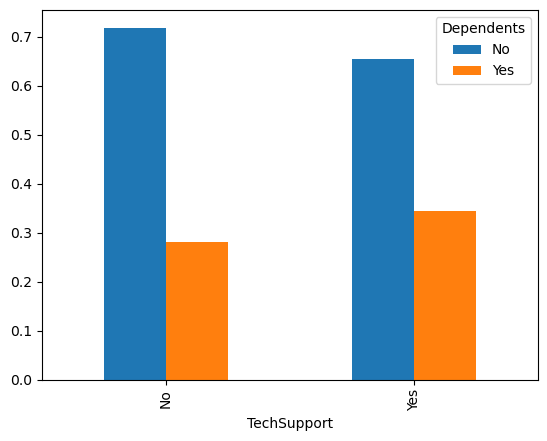

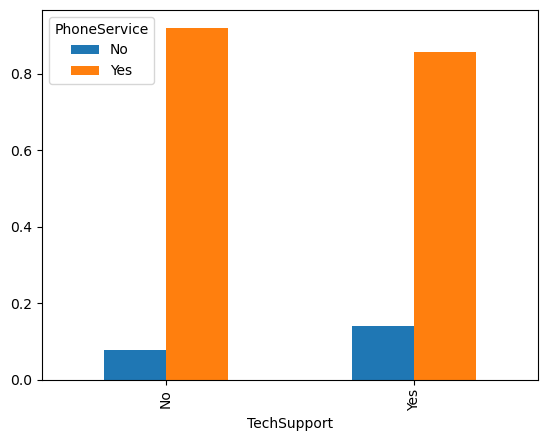

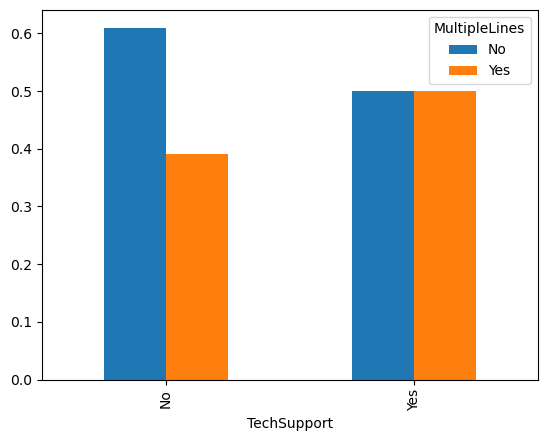

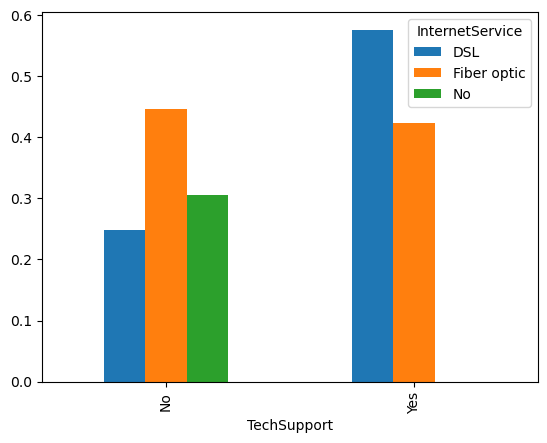

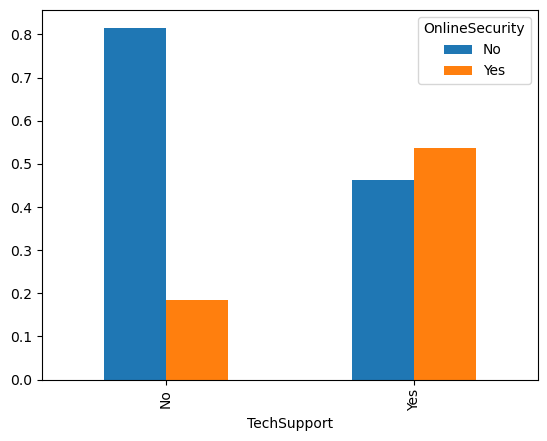

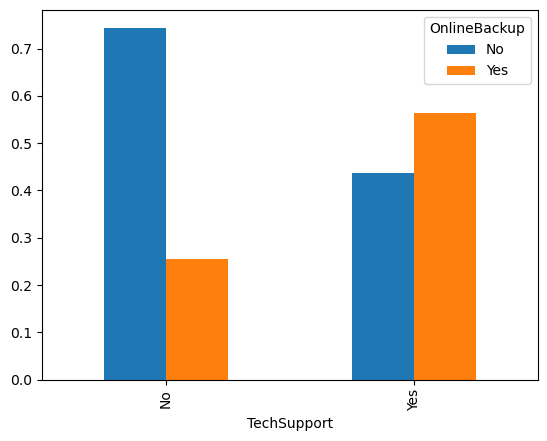

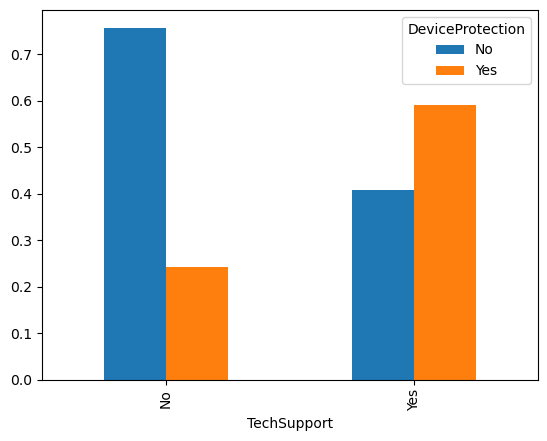

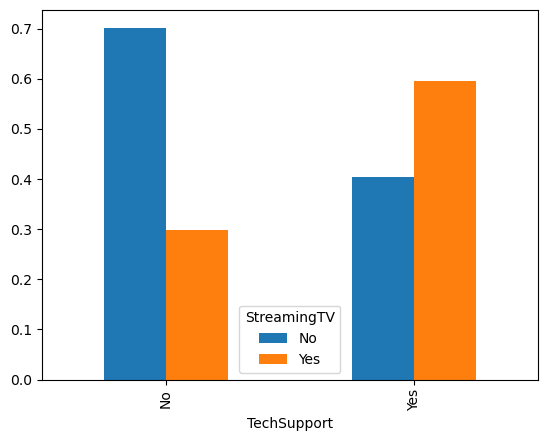

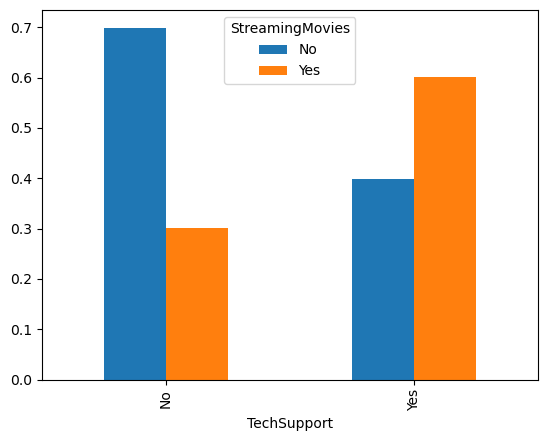

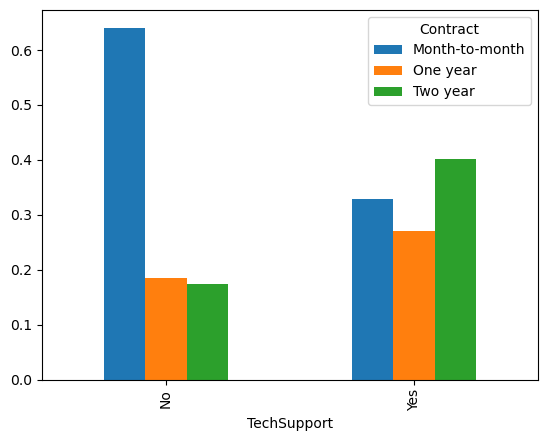

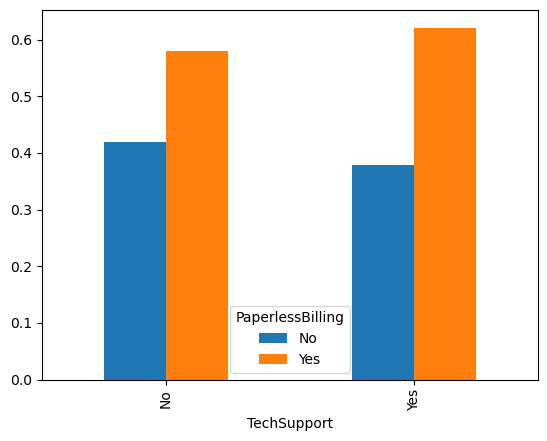

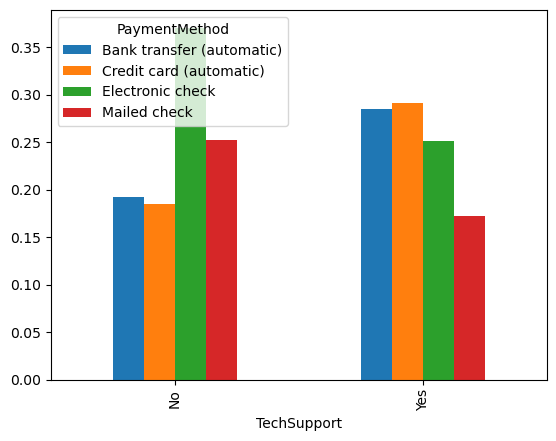

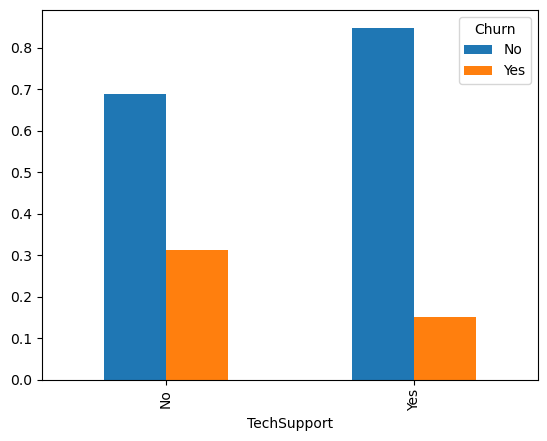

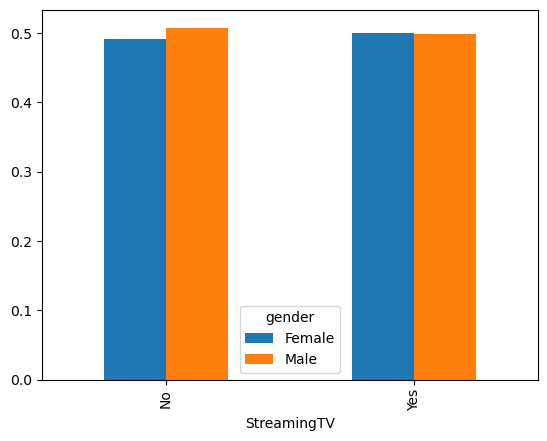

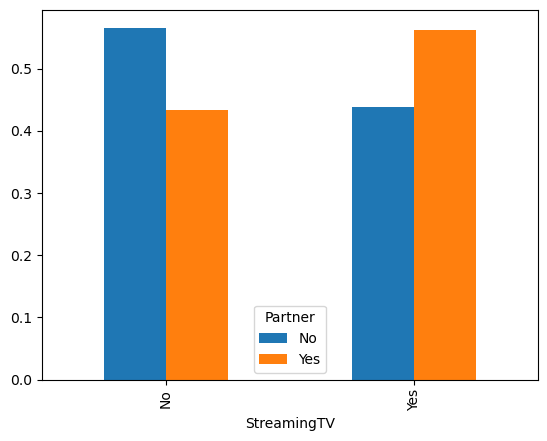

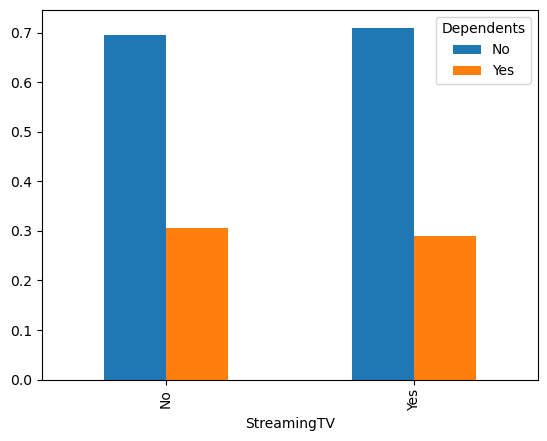

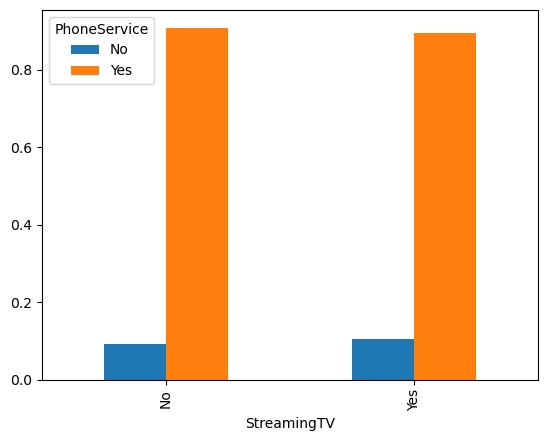

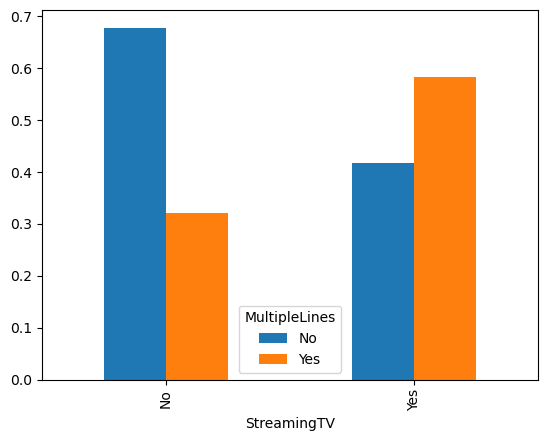

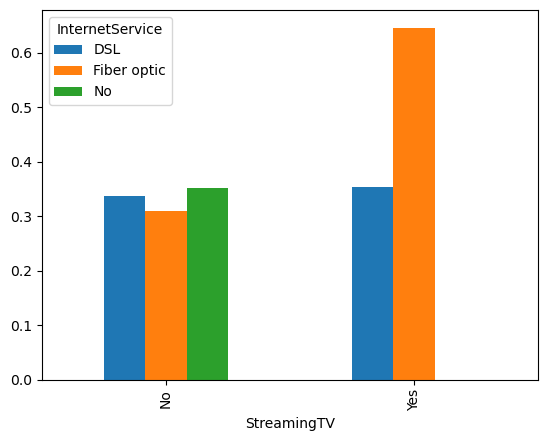

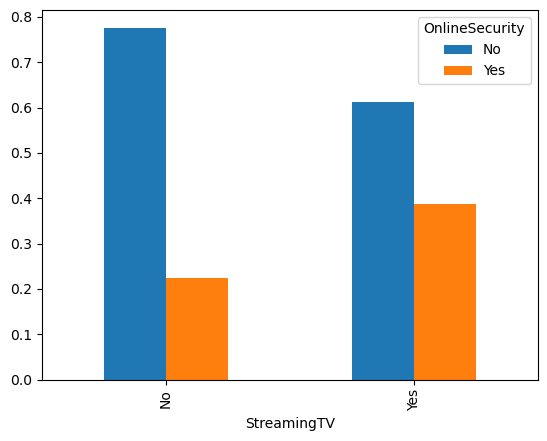

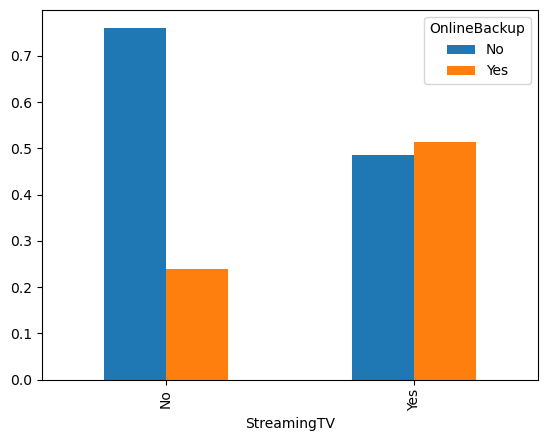

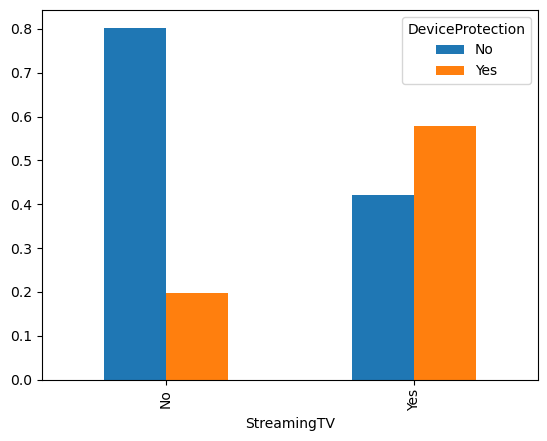

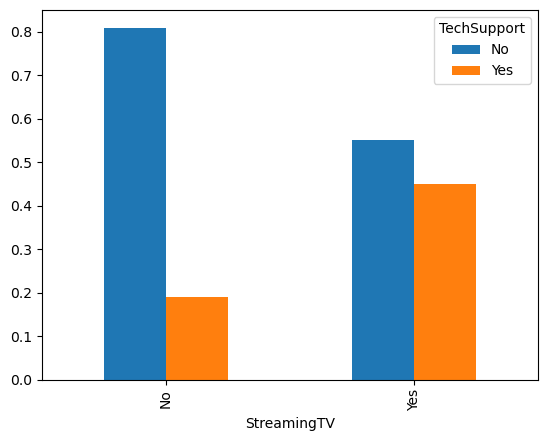

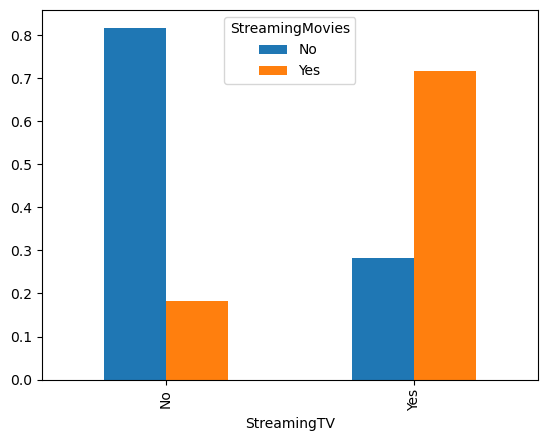

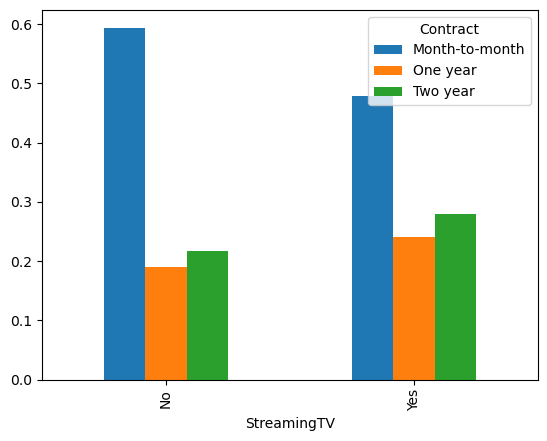

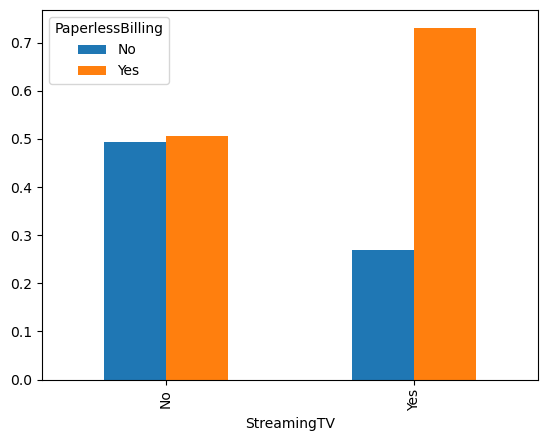

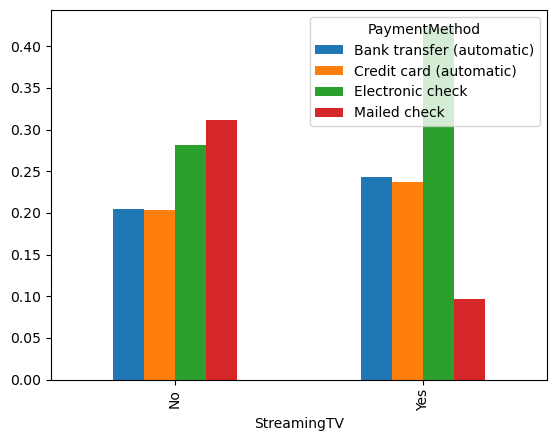

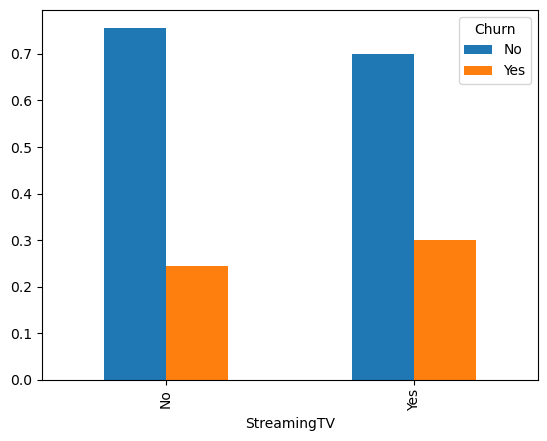

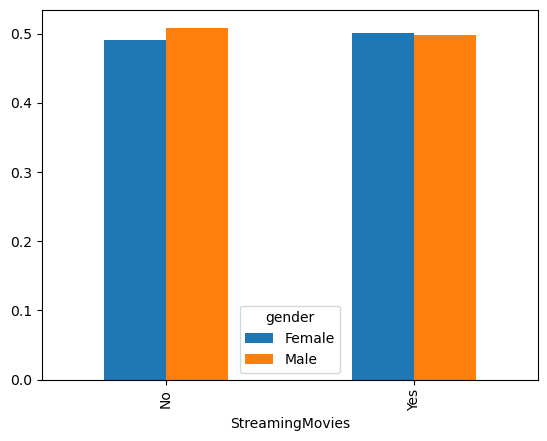

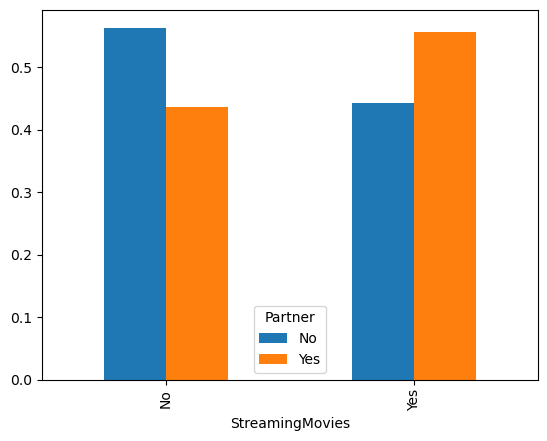

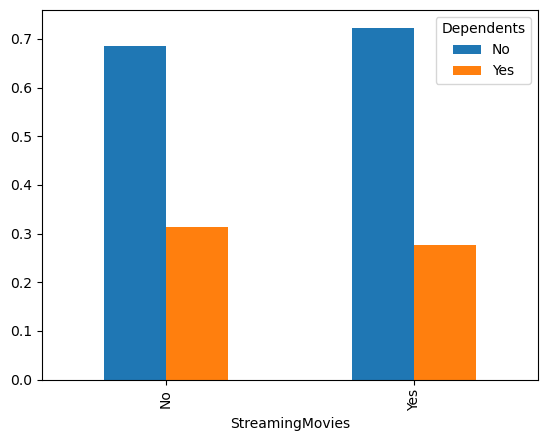

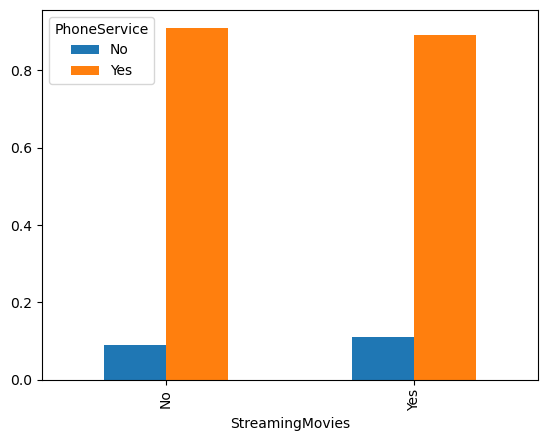

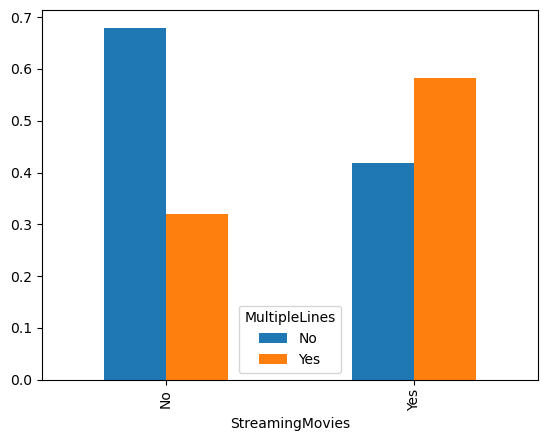

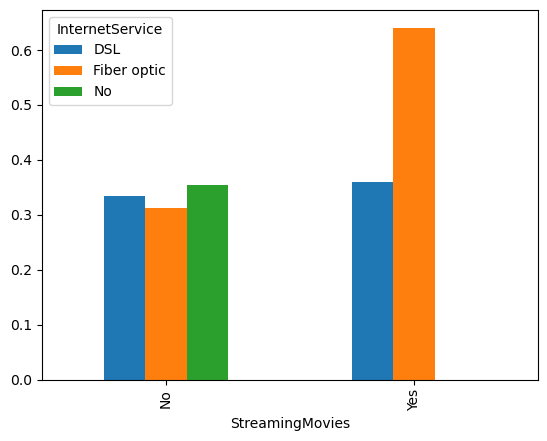

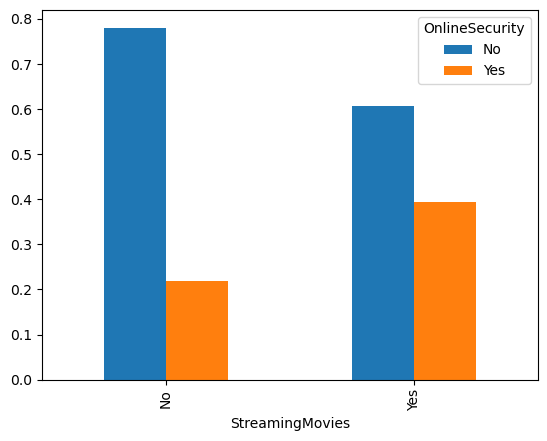

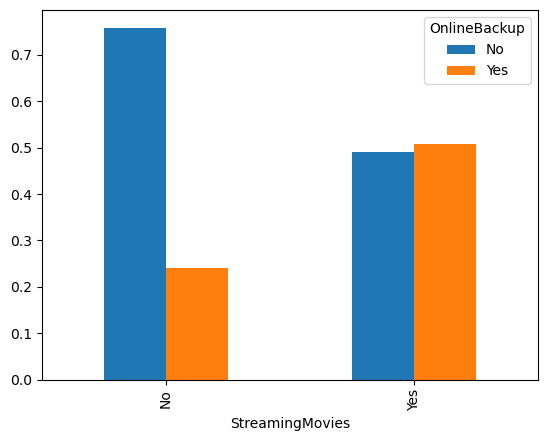

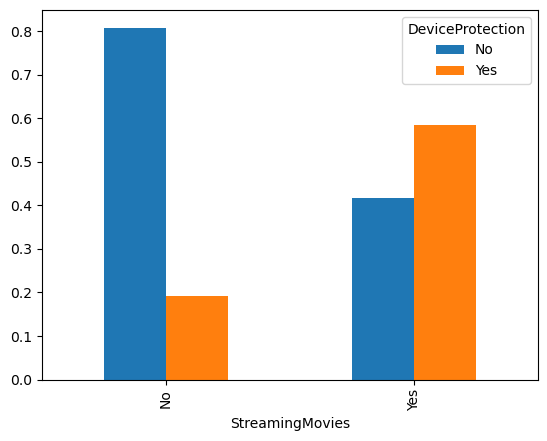

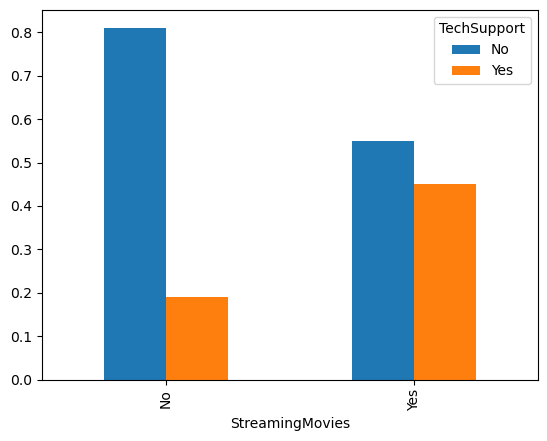

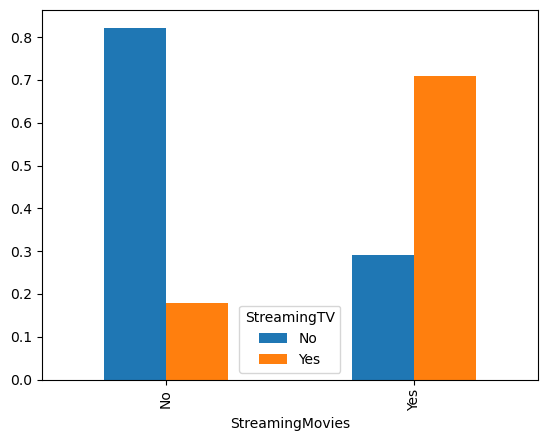

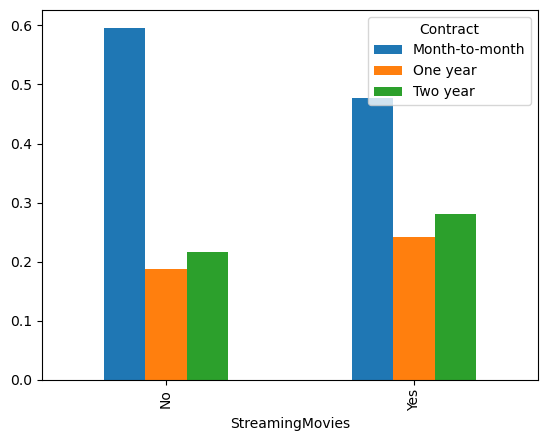

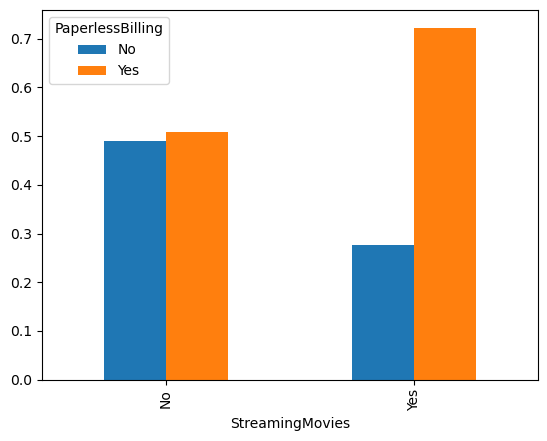

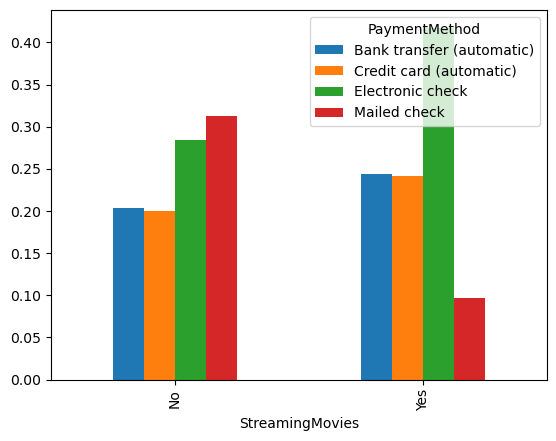

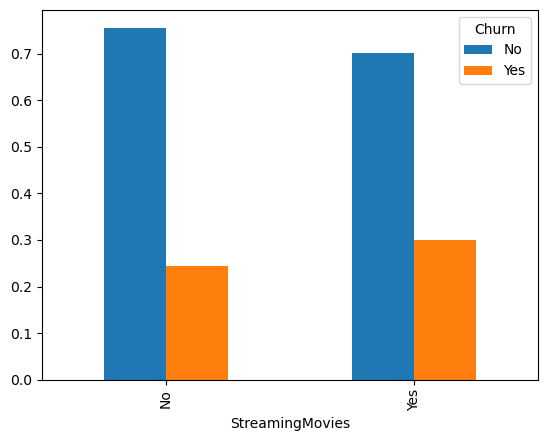

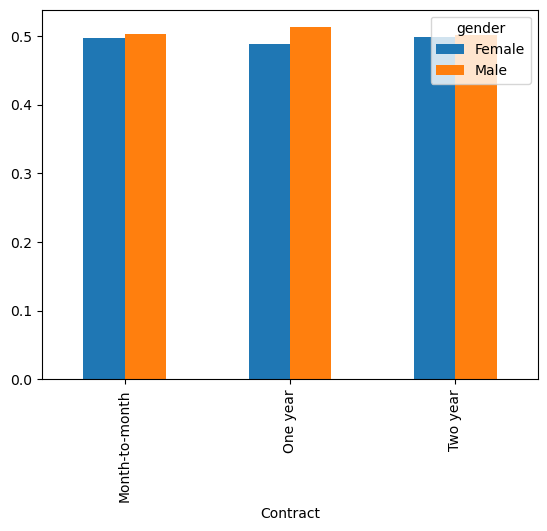

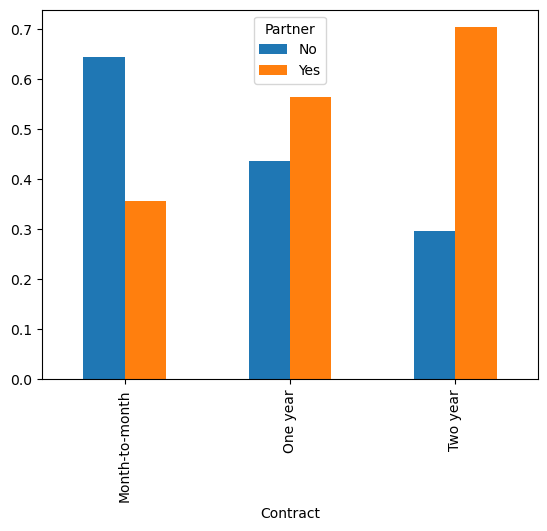

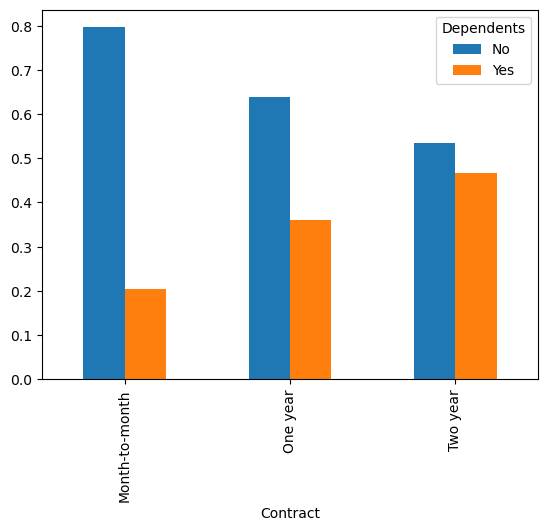

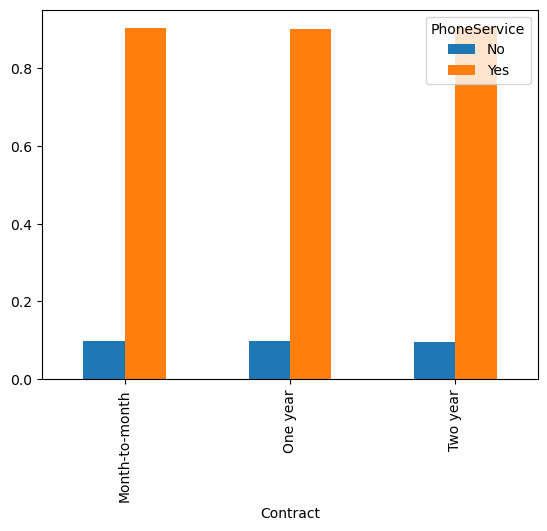

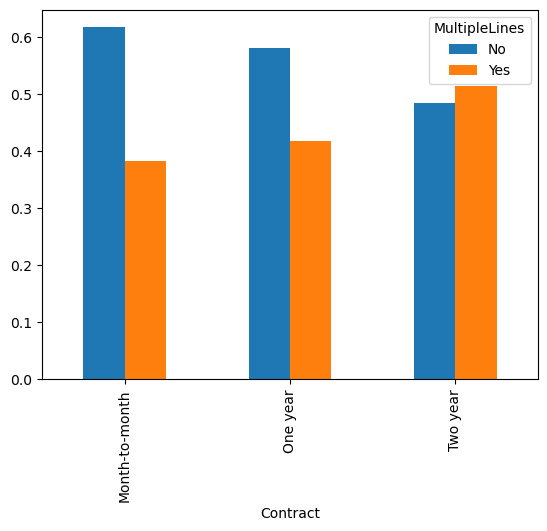

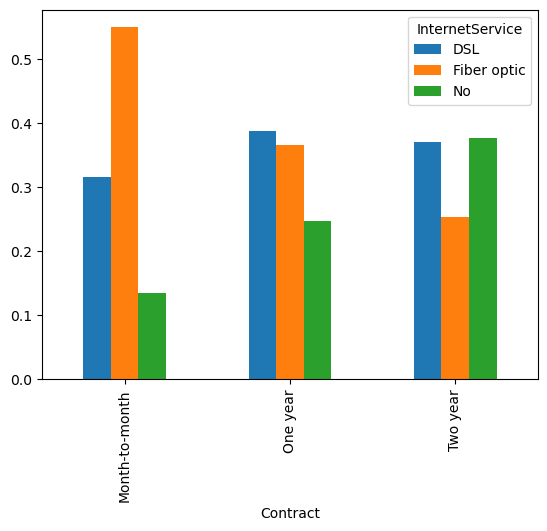

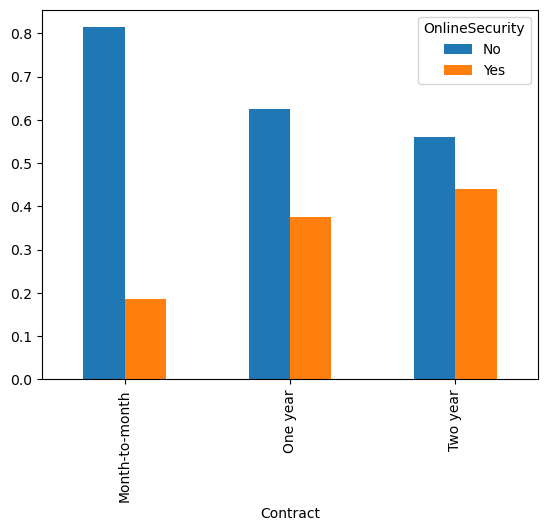

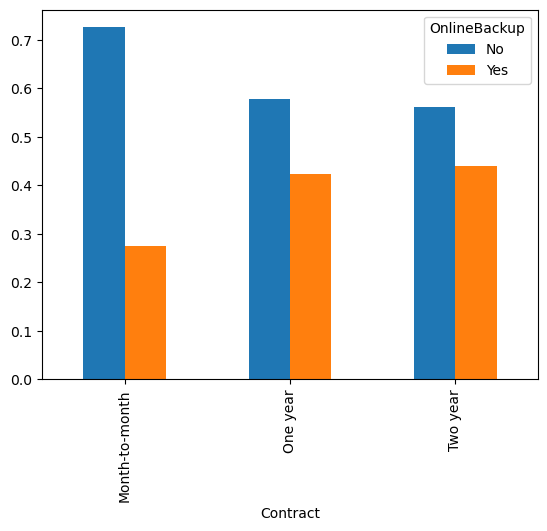

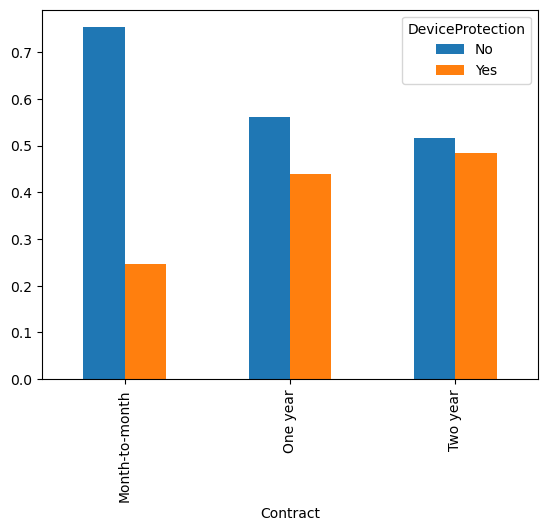

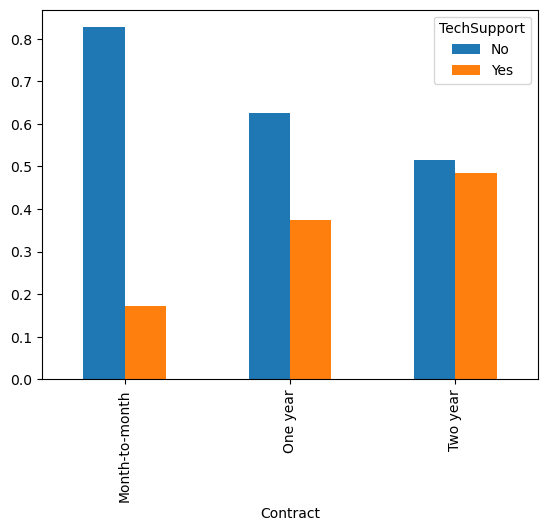

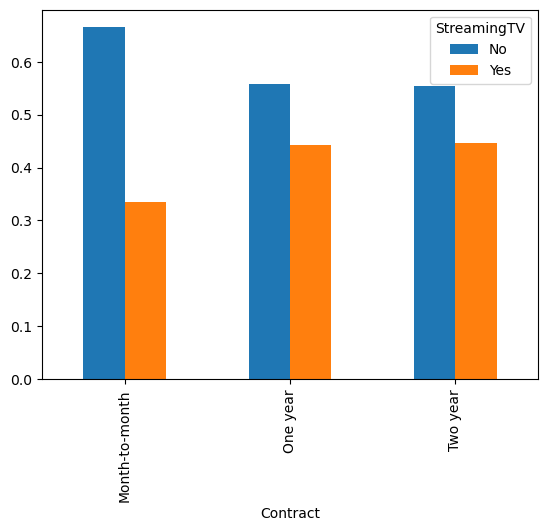

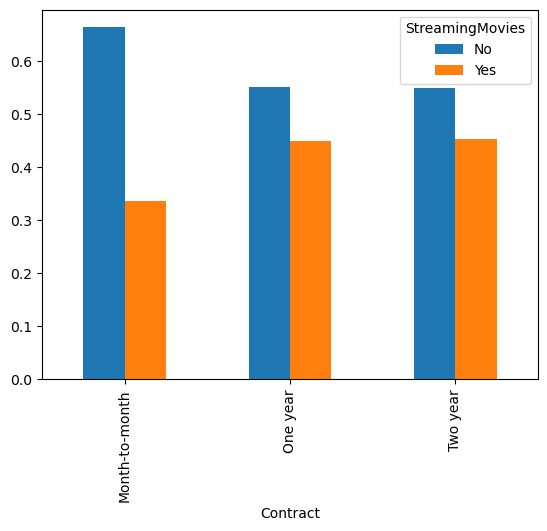

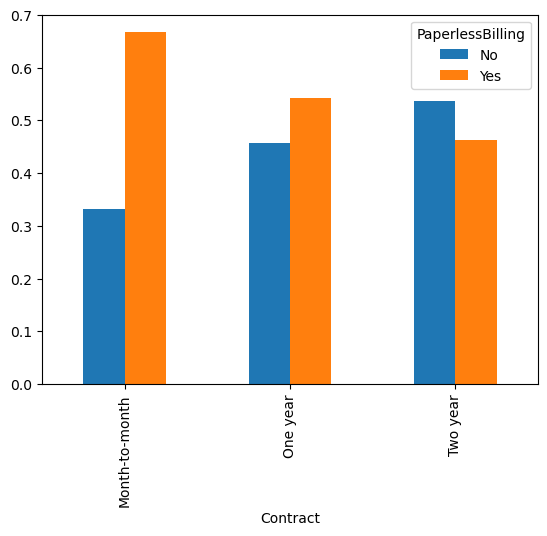

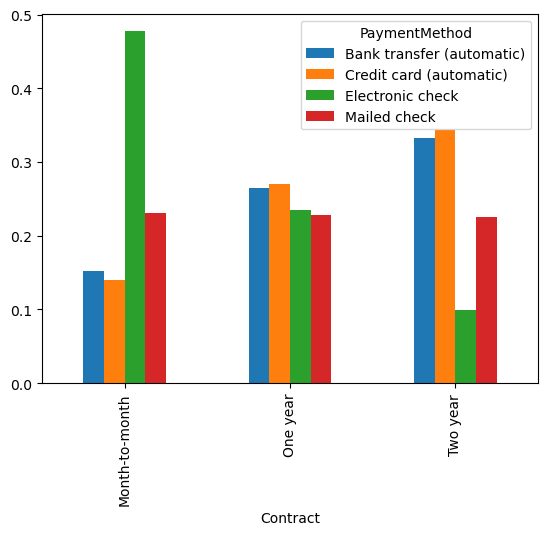

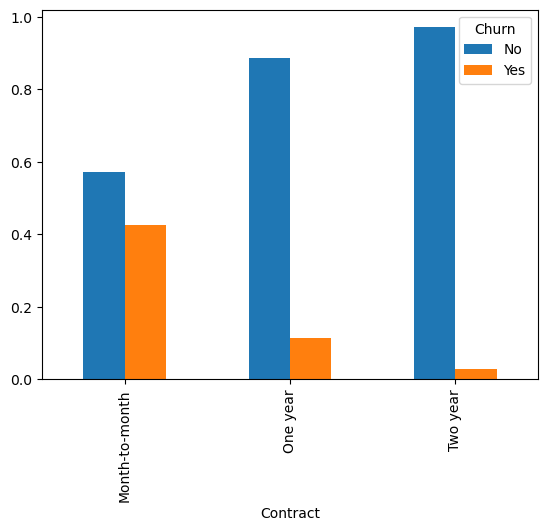

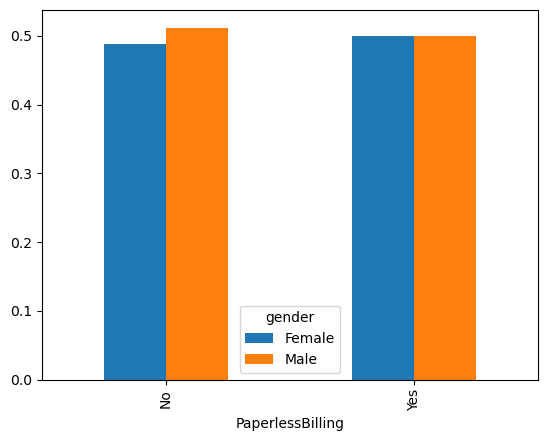

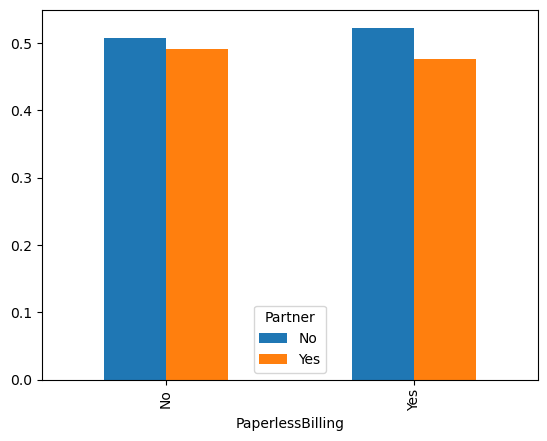

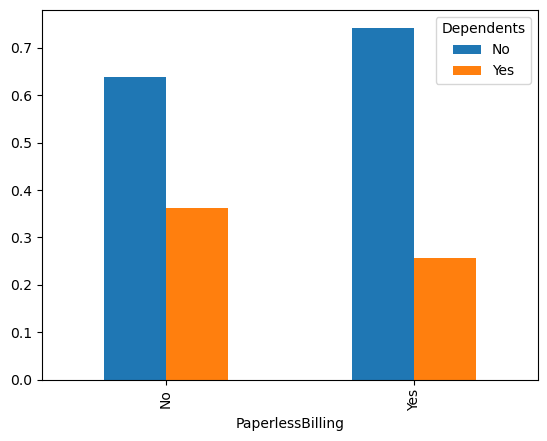

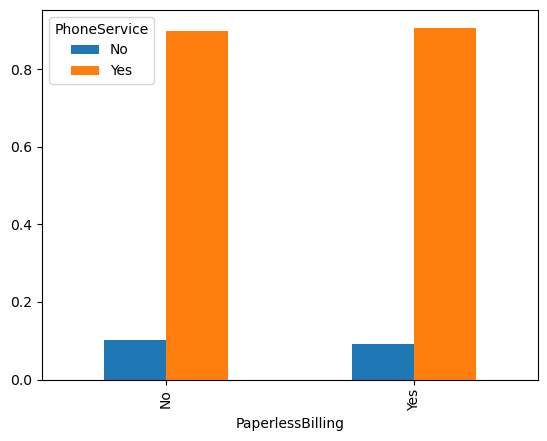

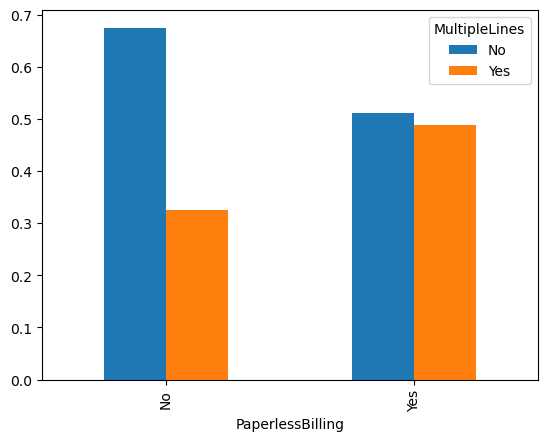

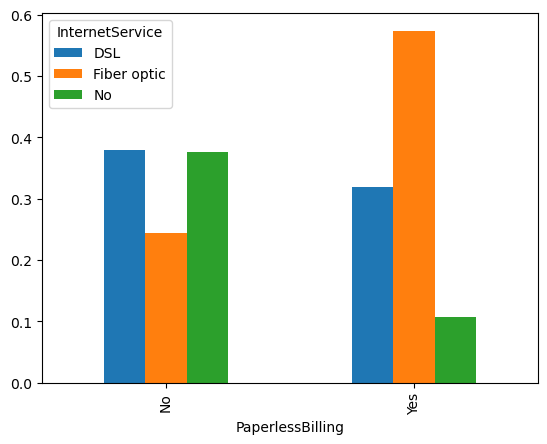

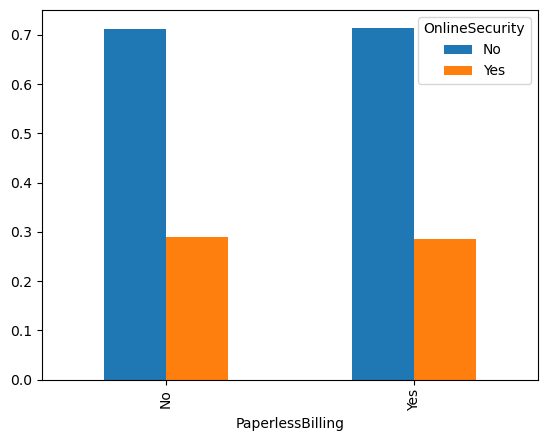

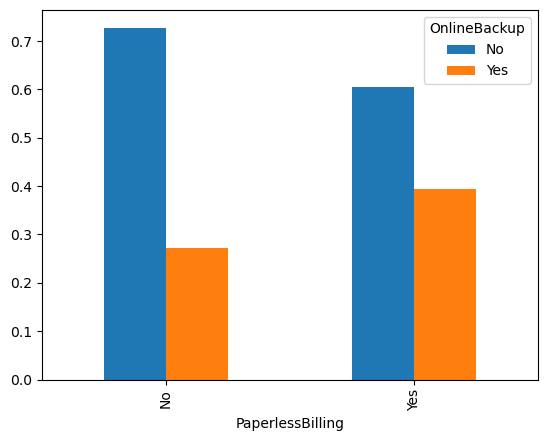

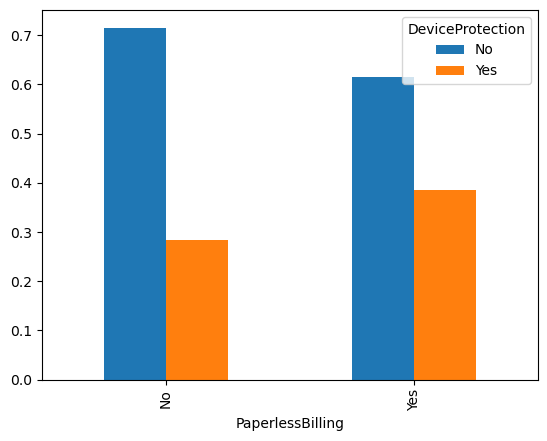

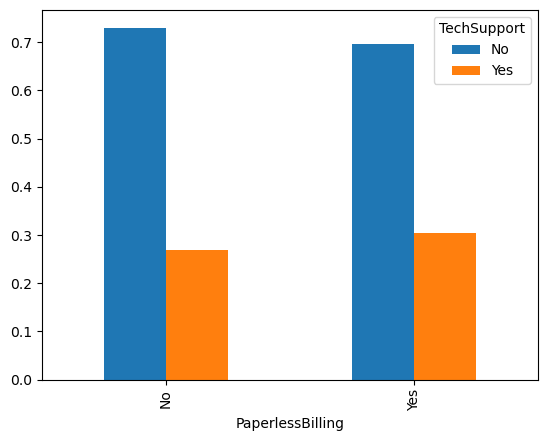

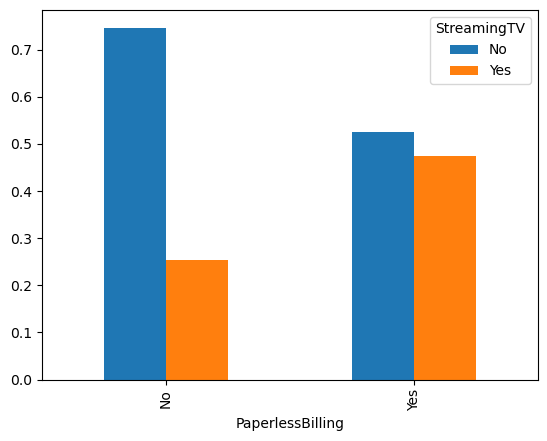

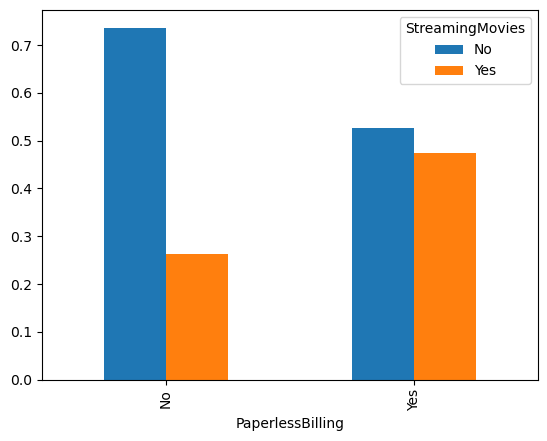

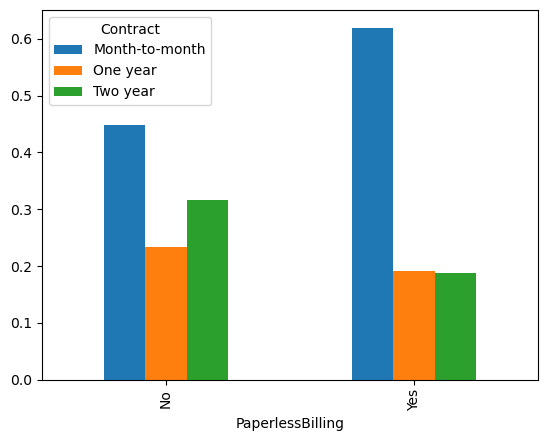

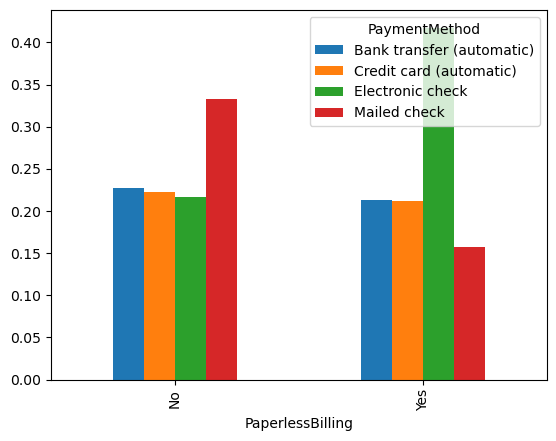

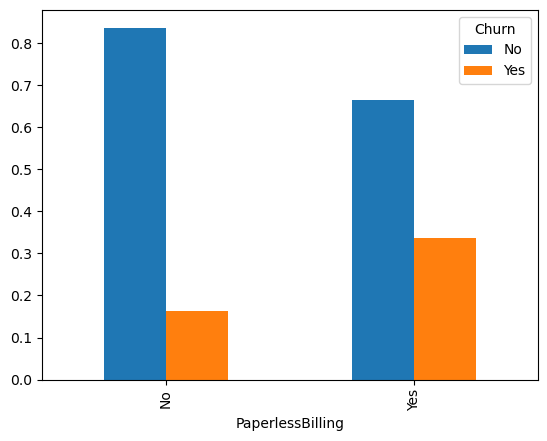

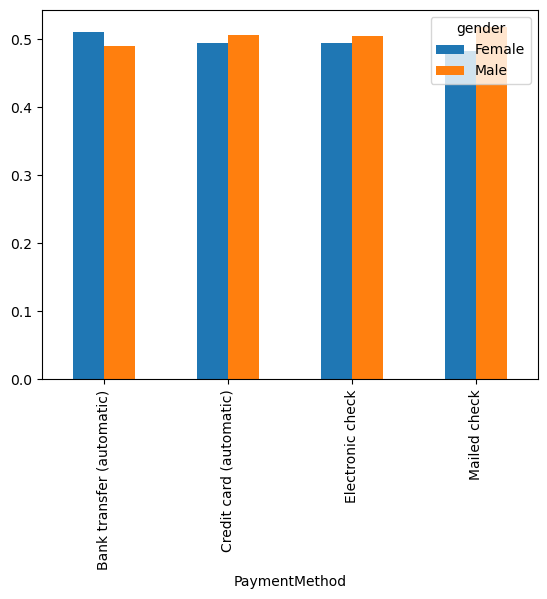

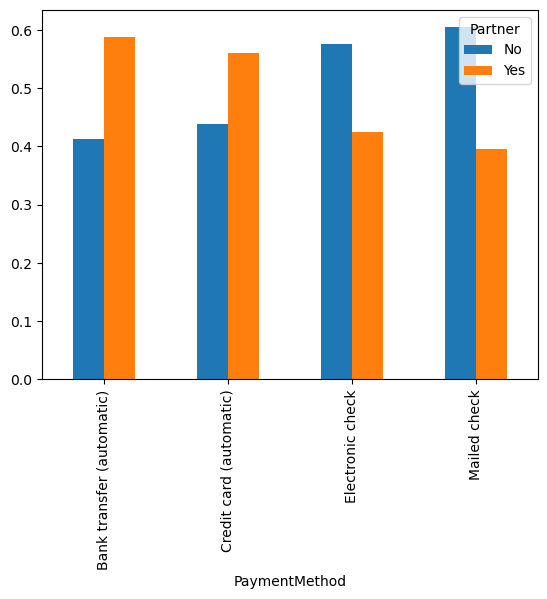

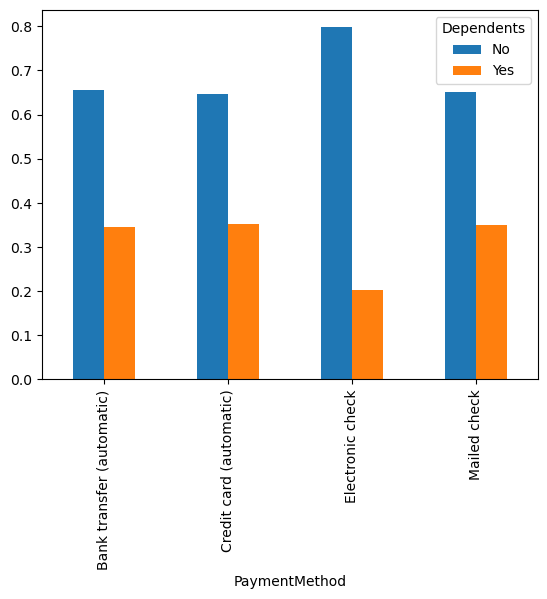

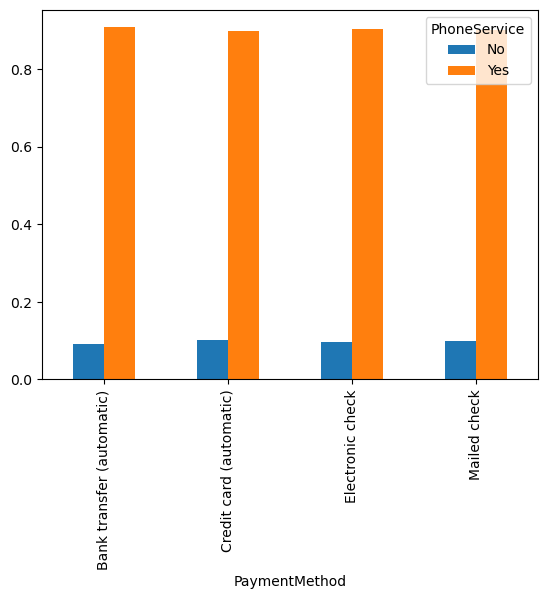

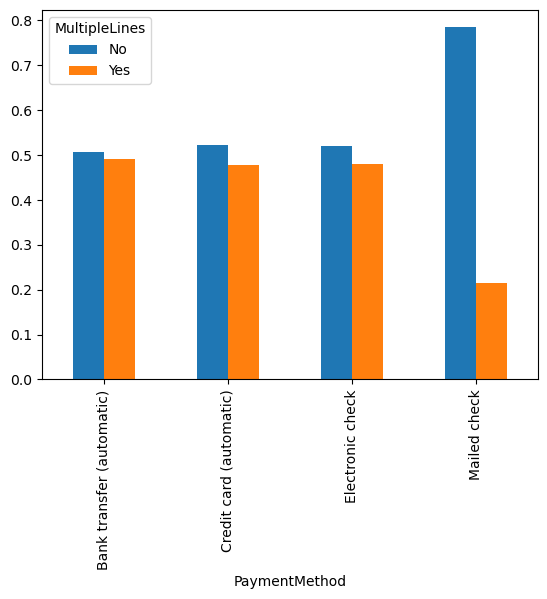

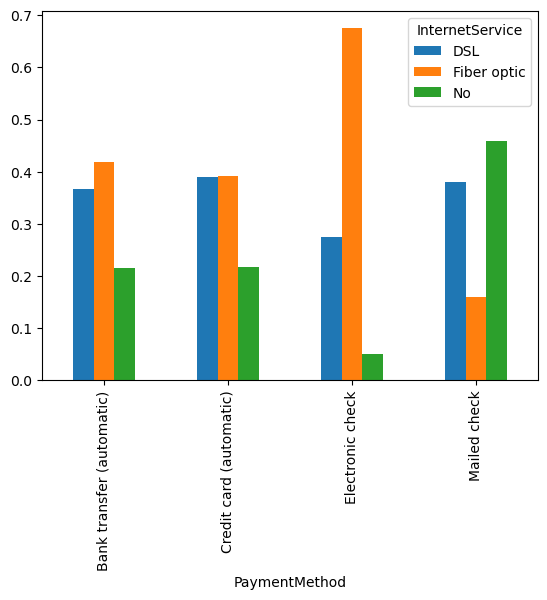

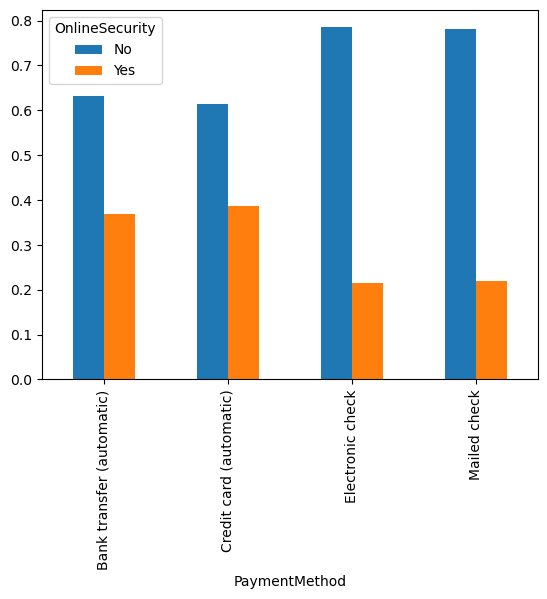

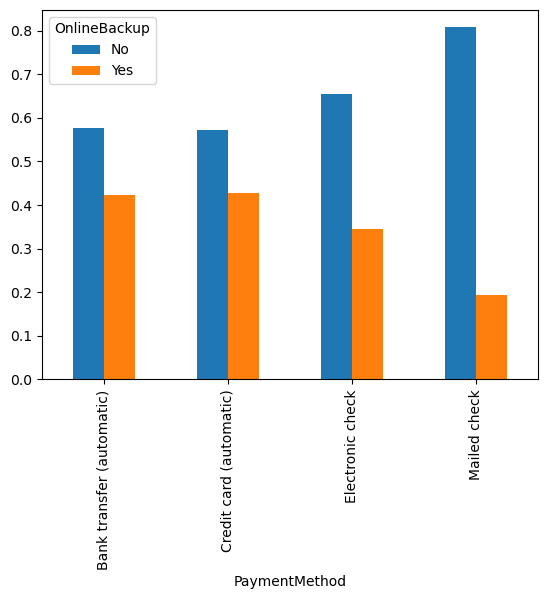

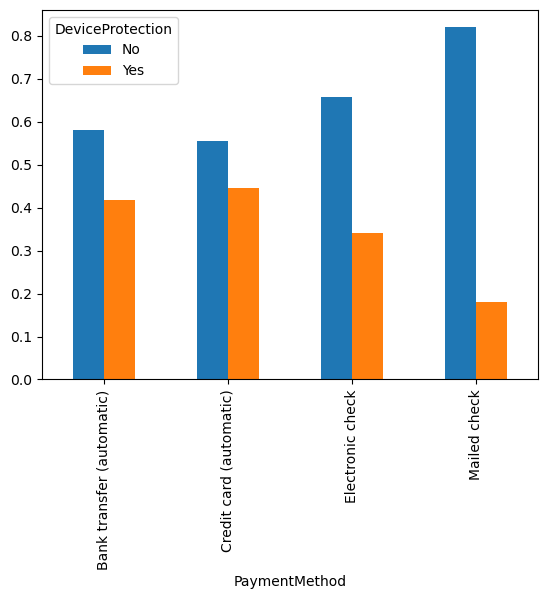

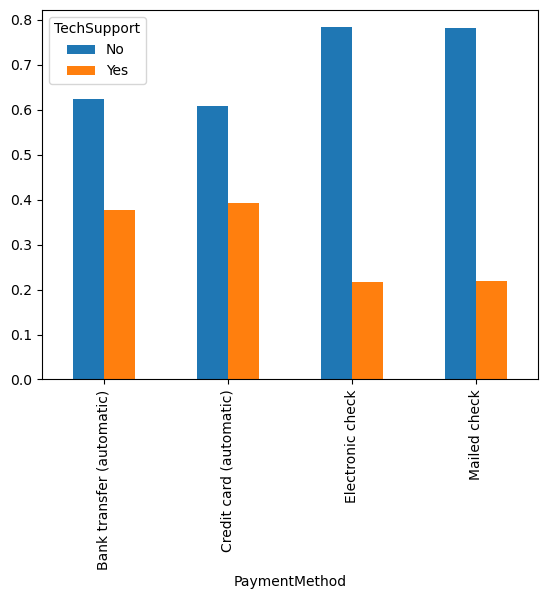

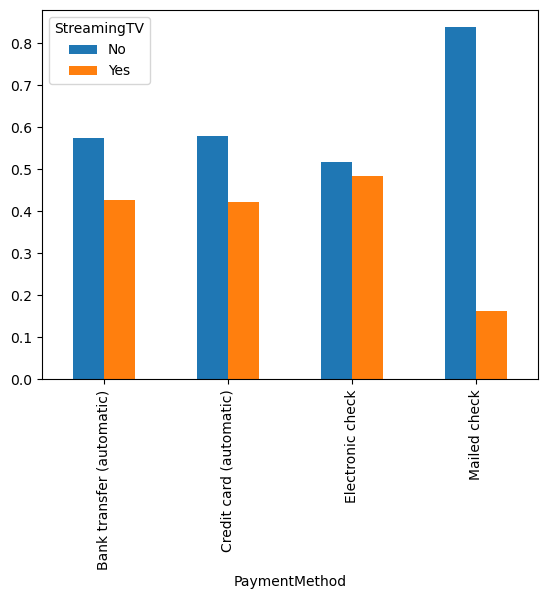

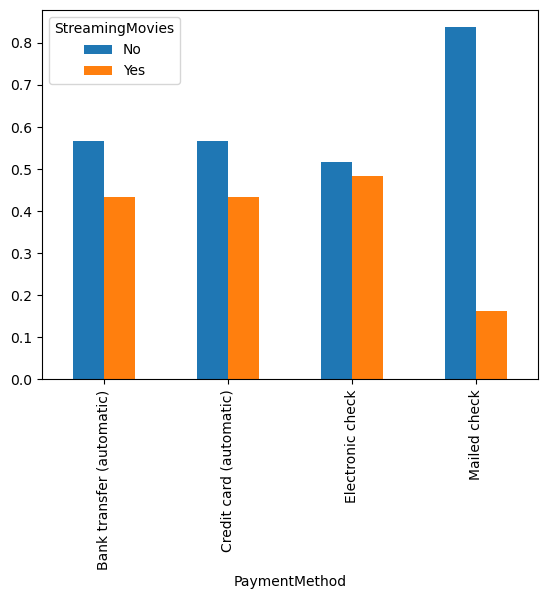

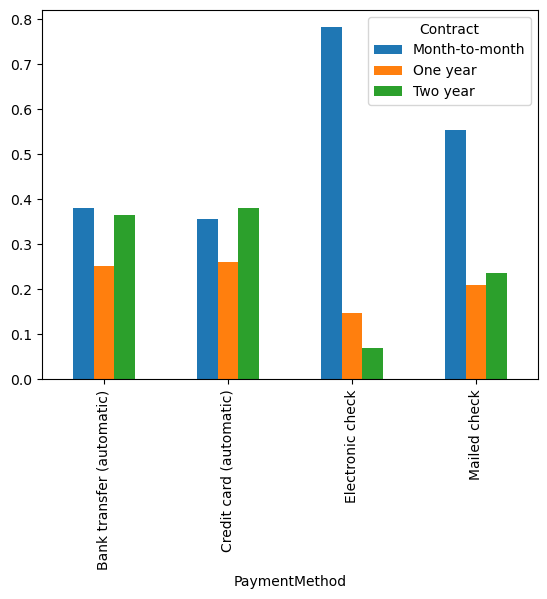

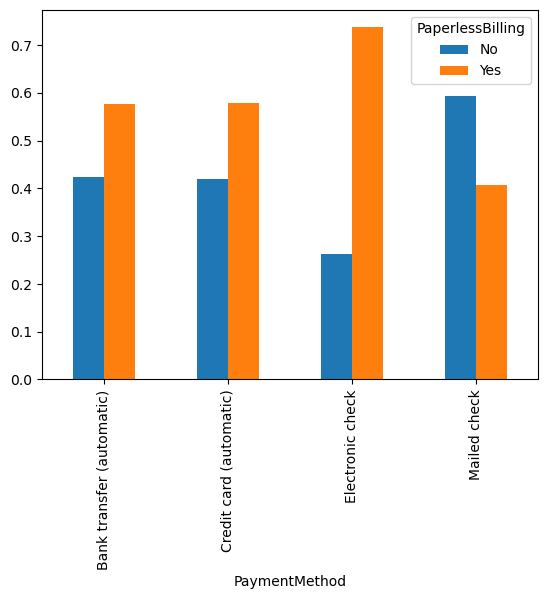

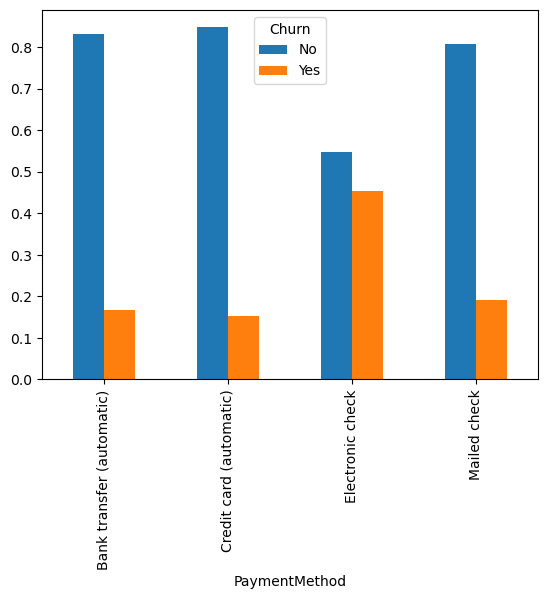

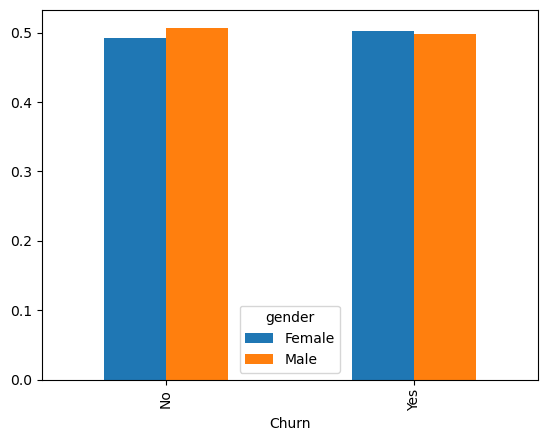

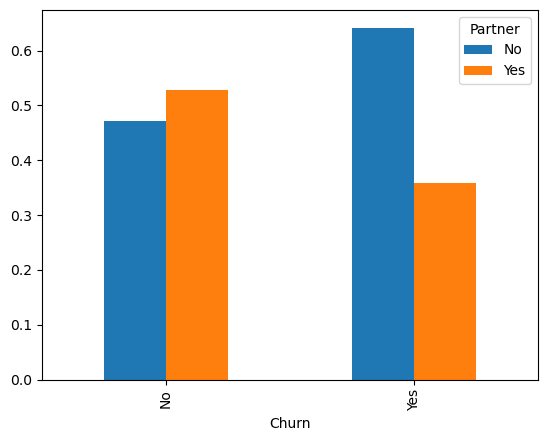

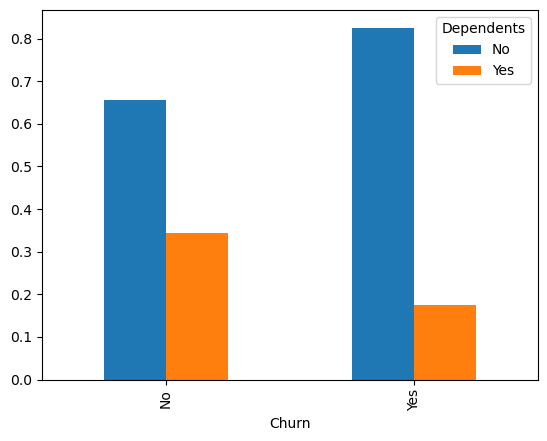

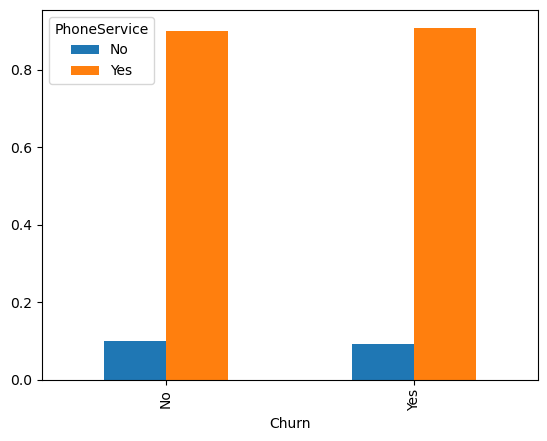

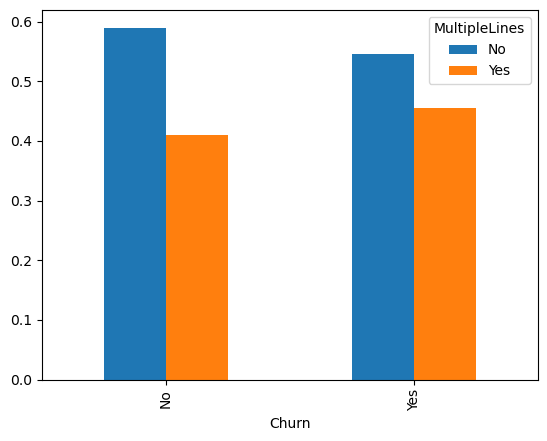

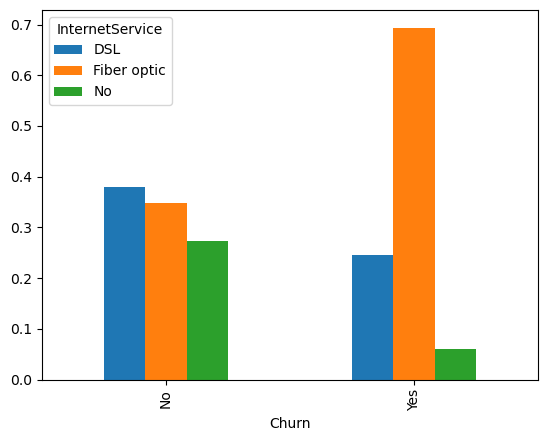

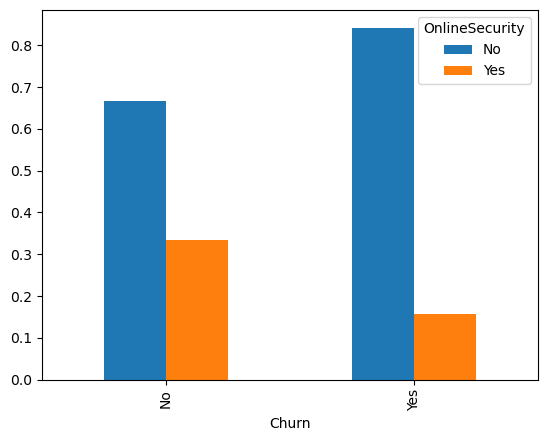

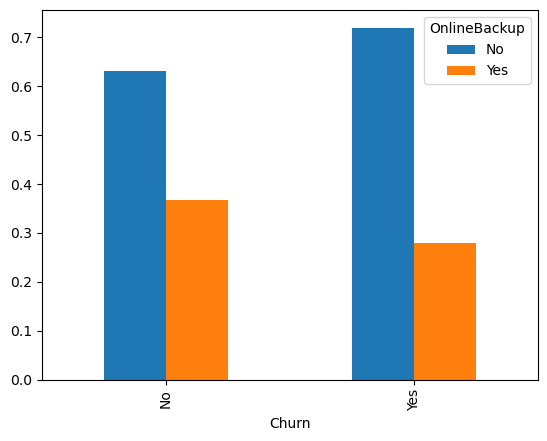

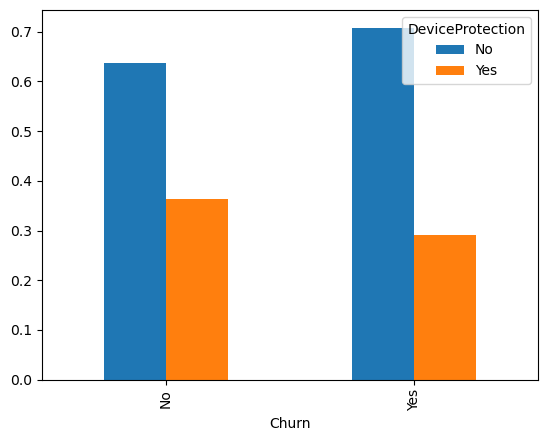

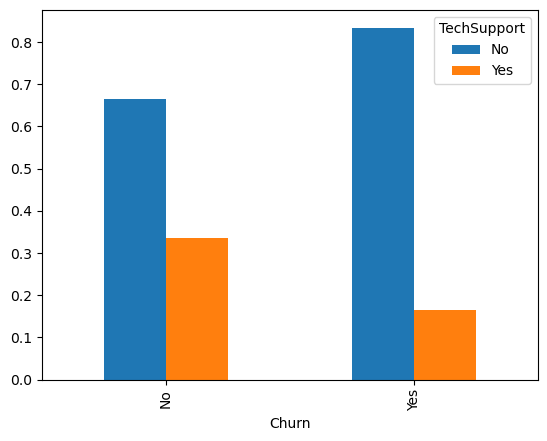

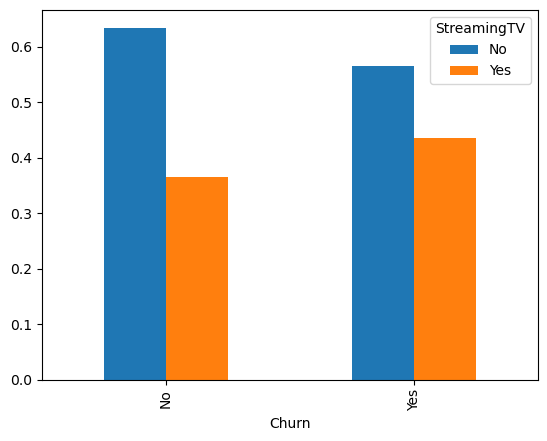

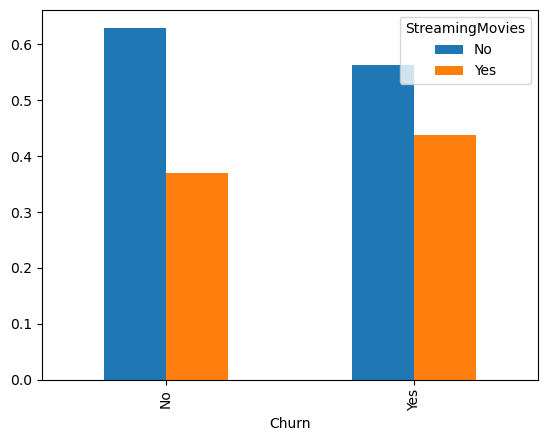

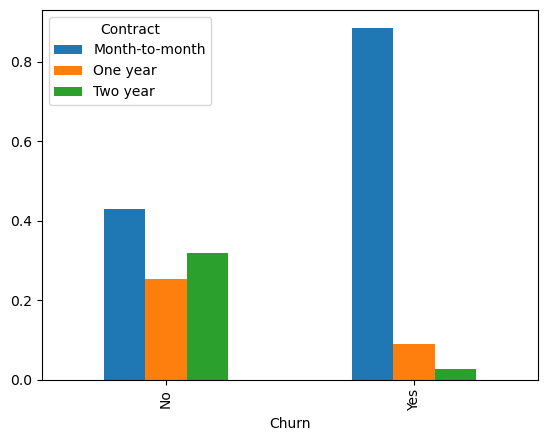

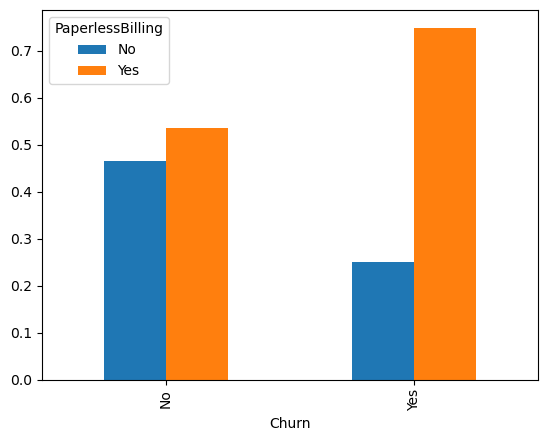

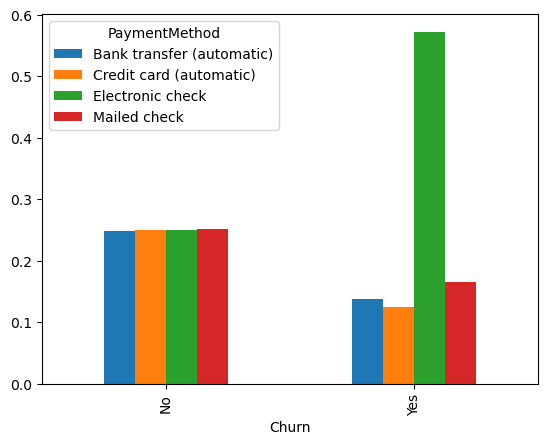

In [33]:
for column in dataset.select_dtypes(include=['object']).columns:
    for column2 in dataset.select_dtypes(include=['object']).columns:
        if column != column2:
            pd.crosstab(index=dataset[column], columns=dataset[column2], normalize='index').plot.bar()
    
# pd.crosstab(index=dataset['SeniorCitizen'],columns=dataset['MultipleLines'],normalize='index').plot.bar()
# pd.crosstab(index=dataset['SeniorCitizen'],columns=dataset['PaymentMethod'],normalize='index').plot.bar()
# pd.crosstab(index=dataset['Churn'],columns=dataset['Churn'],normalize='index').plot.bar()

## 7. Calculate the covariance and correlation values between continuous attributes and graphically represent the correlation matrix. Comment the results.

**Covariance:**

In [ ]:
dataset.cov(numeric_only=True)

**Correlation:**

In [ ]:
dataset.corr(numeric_only=True)

In [ ]:
plt.matshow(dataset.corr(numeric_only=True))

## 8. Perform data normalization (boundaries [0; 1] or [-1; 1]).

See [MinMaxScaler (sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [ ]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

dataset[columns_to_scale].sample(5) # Quick view on data

## 9. Convert categorical variables to continuous type variables.

#### Convert Yes and No to 1 and 0

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    dataset[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in dataset:
    print(f'{col}: {dataset[col].unique()}') 

#### Convert genre

In [ ]:
dataset['gender'].replace({'Female':1,'Male':0},inplace=True)
dataset['gender'].unique()

#### Convert other categorical columns

See [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to onvert categorical variable into dummy/indicator variables.

In [ ]:
categorical_columns=['InternetService','Contract','PaymentMethod']
dataset = pd.get_dummies(data=dataset, columns=categorical_columns)

# Print all columns including new ones
dataset.columns

In [ ]:
# Display types of columns (check new columns)
dataset.dtypes

In [ ]:
dataset.sample(5)